In [1]:
#importer les bibliothèques
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import seaborn as sns

In [2]:
# ou créer une boucle pour importer les fichiers existants 
filenames=['fr_sousalimentation.csv','fr_animaux.csv',
           'fr_céréales.csv', 
           'fr_population.csv', 
           'fr_vegetaux.csv', 'agricultural-land.csv']
#boucle
df=[]
for filename in filenames:
    df.append(pd.read_csv(filename, engine='python', decimal='.', na_values='n/a', header=0,index_col=None))
df[4].info()
df[5].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104871 entries, 0 to 104870
Data columns (total 14 columns):
Code Domaine              104871 non-null object
Domaine                   104871 non-null object
Code zone                 104871 non-null int64
Zone                      104871 non-null object
Code Élément              104871 non-null int64
Élément                   104871 non-null object
Code Produit              104871 non-null int64
Produit                   104871 non-null object
Code année                104871 non-null int64
Année                     104871 non-null int64
Unité                     104871 non-null object
Valeur                    104871 non-null float64
Symbole                   104871 non-null object
Description du Symbole    104871 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 11.2+ MB


,Entity,Code,Year,agricultural_land
0,Afghanistan,AFG,1961,37700000.0
1,Afghanistan,AFG,1962,37760000.0
2,Afghanistan,AFG,1963,37810000.0
3,Afghanistan,AFG,1964,37873000.0
4,Afghanistan,AFG,1965,37875000.0


In [3]:
#attribuer un nom aux données importées et créer une colonne 'table'
sousalimentation=df[0]
animaux=df[1]
céréales=df[2]
population=df[3]
vegetaux=df[4]
terre_agr=df[5]

In [4]:
terre_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13367 entries, 0 to 13366
Data columns (total 4 columns):
Entity               13367 non-null object
Code                 11812 non-null object
Year                 13367 non-null int64
agricultural_land    13367 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 417.8+ KB


In [5]:
animaux.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée


In [6]:
#créer une colonne Type et indiquer le type
animaux['Type']='animal'

In [7]:
animaux.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Type
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées,animal
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées,animal
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,animal
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,animal
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée,animal


In [8]:
#créer une colonne Type et indiquer le type 
vegetaux['Type']='vegetal'

In [9]:
vegetaux.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Type
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169.0,S,Données standardisées,vegetal
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,1173.0,S,Données standardisées,vegetal
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,-350.0,S,Données standardisées,vegetal
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,5992.0,S,Données standardisées,vegetal
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5527,Semences,2511,Blé,2013,2013,Milliers de tonnes,322.0,S,Données standardisées,vegetal


In [10]:
#fusionner les fichiers animaux et vegetaux
#créer une seule base de données ”AlimentTyp”
df=[vegetaux, animaux] 
AlimentType=pd.concat(df,sort='Type')

#description
AlimentType.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 142037 entries, 0 to 37165
Data columns (total 15 columns):
Année                     142037 non-null int64
Code Domaine              142037 non-null object
Code Produit              142037 non-null int64
Code année                142037 non-null int64
Code zone                 142037 non-null int64
Code Élément              142037 non-null int64
Description du Symbole    142037 non-null object
Domaine                   142037 non-null object
Produit                   142037 non-null object
Symbole                   142037 non-null object
Type                      142037 non-null object
Unité                     142037 non-null object
Valeur                    142037 non-null float64
Zone                      142037 non-null object
Élément                   142037 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 17.3+ MB


In [11]:
AlimentType.head()

,Année,Code Domaine,Code Produit,Code année,Code zone,Code Élément,Description du Symbole,Domaine,Produit,Symbole,Type,Unité,Valeur,Zone,Élément
0,2013,FBSH,2511,2013,2,5511,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,S,vegetal,Milliers de tonnes,5169.0,Afghanistan,Production
1,2013,FBSH,2511,2013,2,5611,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,S,vegetal,Milliers de tonnes,1173.0,Afghanistan,Importations - Quantité
2,2013,FBSH,2511,2013,2,5072,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,S,vegetal,Milliers de tonnes,-350.0,Afghanistan,Variation de stock
3,2013,FBSH,2511,2013,2,5301,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,S,vegetal,Milliers de tonnes,5992.0,Afghanistan,Disponibilité intérieure
4,2013,FBSH,2511,2013,2,5527,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,S,vegetal,Milliers de tonnes,322.0,Afghanistan,Semences


In [12]:
#rechercher les alchools
AlimentTypeBoissonAlcool = AlimentType[AlimentType['Produit'].str.contains('Alcoo', na=False)]
AlimentTypeBoissonAlcool#['Produit']


,Année,Code Domaine,Code Produit,Code année,Code zone,Code Élément,Description du Symbole,Domaine,Produit,Symbole,Type,Unité,Valeur,Zone,Élément
362,2013,FBSH,2658,2013,2,5611,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Boissons Alcooliques,S,vegetal,Milliers de tonnes,0.00,Afghanistan,Importations - Quantité
363,2013,FBSH,2658,2013,2,5301,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Boissons Alcooliques,S,vegetal,Milliers de tonnes,0.00,Afghanistan,Disponibilité intérieure
364,2013,FBSH,2658,2013,2,5142,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Boissons Alcooliques,S,vegetal,Milliers de tonnes,0.00,Afghanistan,Nourriture
365,2013,FBSH,2658,2013,2,645,Donnée calculée,Bilans Alimentaire (Ancienne méthodologie et p...,Boissons Alcooliques,Fc,vegetal,kg,0.00,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...
366,2013,FBSH,2658,2013,2,664,Donnée calculée,Bilans Alimentaire (Ancienne méthodologie et p...,Boissons Alcooliques,Fc,vegetal,Kcal/personne/jour,0.00,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour)
1076,2013,FBSH,2658,2013,202,5511,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Boissons Alcooliques,S,vegetal,Milliers de tonnes,371.00,Afrique du Sud,Production
1077,2013,FBSH,2658,2013,202,5611,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Boissons Alcooliques,S,vegetal,Milliers de tonnes,79.00,Afrique du Sud,Importations - Quantité
1078,2013,FBSH,2658,2013,202,5072,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Boissons Alcooliques,S,vegetal,Milliers de tonnes,0.00,Afrique du Sud,Variation de stock
1079,2013,FBSH,2658,2013,202,5911,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Boissons Alcooliques,S,vegetal,Milliers de tonnes,53.00,Afrique du Sud,Exportations - Quantité
1080,2013,FBSH,2658,2013,202,5301,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Boissons Alcooliques,S,vegetal,Milliers de tonnes,397.00,Afrique du Sud,Disponibilité intérieure


In [13]:
#pd.concat(df,sort='Produit')
#print(AlimentType)

In [14]:
#remplacer les valeurs NaN par Zero
AlimentType.fillna(0)

,Année,Code Domaine,Code Produit,Code année,Code zone,Code Élément,Description du Symbole,Domaine,Produit,Symbole,Type,Unité,Valeur,Zone,Élément
0,2013,FBSH,2511,2013,2,5511,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,S,vegetal,Milliers de tonnes,5169.00,Afghanistan,Production
1,2013,FBSH,2511,2013,2,5611,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,S,vegetal,Milliers de tonnes,1173.00,Afghanistan,Importations - Quantité
2,2013,FBSH,2511,2013,2,5072,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,S,vegetal,Milliers de tonnes,-350.00,Afghanistan,Variation de stock
3,2013,FBSH,2511,2013,2,5301,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,S,vegetal,Milliers de tonnes,5992.00,Afghanistan,Disponibilité intérieure
4,2013,FBSH,2511,2013,2,5527,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,S,vegetal,Milliers de tonnes,322.00,Afghanistan,Semences
5,2013,FBSH,2511,2013,2,5123,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,S,vegetal,Milliers de tonnes,775.00,Afghanistan,Pertes
6,2013,FBSH,2511,2013,2,5142,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,S,vegetal,Milliers de tonnes,4895.00,Afghanistan,Nourriture
7,2013,FBSH,2511,2013,2,645,Donnée calculée,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,Fc,vegetal,kg,160.23,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...
8,2013,FBSH,2511,2013,2,664,Donnée calculée,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,Fc,vegetal,Kcal/personne/jour,1369.00,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour)
9,2013,FBSH,2511,2013,2,674,Donnée calculée,Bilans Alimentaire (Ancienne méthodologie et p...,Blé,Fc,vegetal,g/personne/jour,36.91,Afghanistan,Disponibilité de protéines en quantité (g/pers...


In [15]:
#DF : composition
AlimentType.describe(include='all')

,Année,Code Domaine,Code Produit,Code année,Code zone,Code Élément,Description du Symbole,Domaine,Produit,Symbole,Type,Unité,Valeur,Zone,Élément
count,142037.0,142037,142037.000000,142037.0,142037.000000,142037.000000,142037,142037,142037,142037,142037,142037,142037.000000,142037,142037
unique,NaN,1,NaN,NaN,NaN,NaN,3,1,98,3,2,4,NaN,175,15
top,NaN,FBSH,NaN,NaN,NaN,NaN,Données standardisées,Bilans Alimentaire (Ancienne méthodologie et p...,Maïs,S,vegetal,Milliers de tonnes,NaN,Chine,Disponibilité intérieure
freq,NaN,142037,NaN,NaN,NaN,NaN,89308,142037,2318,89308,104871,90079,NaN,1118,15478
mean,2013.0,NaN,2632.202546,2013.0,127.460795,3671.410851,NaN,NaN,NaN,NaN,NaN,NaN,276.008506,NaN,NaN
std,0.0,NaN,92.737655,0.0,75.252888,2293.189354,NaN,NaN,NaN,NaN,NaN,NaN,5583.860856,NaN,NaN
min,2013.0,NaN,2511.000000,2013.0,1.000000,645.000000,NaN,NaN,NaN,NaN,NaN,NaN,-39863.000000,NaN,NaN
25%,2013.0,NaN,2556.000000,2013.0,66.000000,674.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,2013.0,NaN,2613.000000,2013.0,121.000000,5142.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
75%,2013.0,NaN,2734.000000,2013.0,189.000000,5511.000000,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN


In [16]:
#Elément : composition
AlimentType['Élément']

0                                               Production
1                                  Importations - Quantité
2                                       Variation de stock
3                                 Disponibilité intérieure
4                                                 Semences
5                                                   Pertes
6                                               Nourriture
7        Disponibilité alimentaire en quantité (kg/pers...
8           Disponibilité alimentaire (Kcal/personne/jour)
9        Disponibilité de protéines en quantité (g/pers...
10       Disponibilité de matière grasse en quantité (g...
11                                              Production
12                                 Importations - Quantité
13                                Disponibilité intérieure
14                                                Semences
15                                                  Pertes
16                                              Nourritu

In [17]:
#pivoter la colonne Elément
Pivot1=pd.pivot_table(AlimentType, index=[ 'Zone', 'Type','Code zone','Produit','Code Produit', 'Année' ], values='Valeur', 
                      columns='Élément', margins=True)
Pivot1.head(40)
#détail par ZOne, produit et Type

Élément                                                                   Aliments pour animaux  \
Zone        Type    Code zone Produit                 Code Produit Année                          
Afghanistan animal  2         Abats Comestible        2736         2013                     NaN   
                              Beurre, Ghee            2740         2013                     NaN   
                              Crème                   2743         2013                     NaN   
                              Graisses Animales Crue  2737         2013                     NaN   
                              Lait - Excl Beurre      2848         2013                   123.0   
                              Oeufs                   2744         2013                     NaN   
                              Poissons Eau Douce      2761         2013                     NaN   
                              Viande d'Ovins/Caprins  2732         2013                     NaN   
                              Viande de Bovins        2731         2013                     NaN   
                              Viande de Volailles     2734         2013                     NaN   
                              Viande, Autre           2735         2013                     NaN   
            vegetal 2         Agrumes, Autres         2614         2013                     NaN   
                              Aliments pour enfants   2680         2013                     NaN   
                              Ananas                  2618         2013                     NaN   
                              Bananes                 2615         2013                     NaN   
                              Bière                   2656         2013                     NaN   
                              Blé                     2511         2013                     NaN   
                              Boissons Alcooliques    2658         2013                     NaN   
                              Café                    2630         2013                     NaN   
                              Coco (Incl Coprah)      2560         2013                     NaN   
                              Céréales, Autres        2520         2013                     NaN   
                              Dattes                  2619         2013                     NaN   
                              Edulcorants Autres      2543         2013                     NaN   
                              Feve de Cacao           2633         2013                     NaN   
                              Fruits, Autres          2625         2013                     NaN   
                              Graines de coton        2559         2013                     NaN   
                              Graines de tournesol    2557         2013                     NaN   
                              Huil Plantes Oleif Autr 2586         2013                     NaN   
                              Huile Graines de Coton  2575         2013                     NaN   
                              Huile d'Arachide        2572         2013                     NaN   
                              Huile d'Olive           2580         2013                     NaN   
                              Huile de Colza&Moutarde 2574         2013                     NaN   
                              Huile de Palme          2577         2013                     NaN   
                              Huile de Soja           2571         2013                     NaN   
                              Huile de Sésame         2579         2013                     NaN   
                              Huile de Tournesol      2573         2013                     NaN   
                              Légumes, Autres         2605         2013                     NaN   
                              Légumineuses Autres     2549         2013                     4.0   
                              Maïs      

A multiplier par 1 Mn 'Aliments pour animaux','Autres utilisations (non alimentaire)','Disponibilité intérieure',
            'Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production',
            'Semences','Traitement','Variation de stock'

In [18]:
columns_list = ['Nourriture', 'Disponibilité intérieure', 'Aliments pour animaux', 'Autres utilisations (non alimentaire)', 'Exportations - Quantité', 'Importations - Quantité', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']
for col in columns_list:
    Pivot1[col]=Pivot1[col]*1000000

Pivot1.head(200)

Élément                                                                   Aliments pour animaux  \
Zone        Type    Code zone Produit                 Code Produit Année                          
Afghanistan animal  2         Abats Comestible        2736         2013                     NaN   
                              Beurre, Ghee            2740         2013                     NaN   
                              Crème                   2743         2013                     NaN   
                              Graisses Animales Crue  2737         2013                     NaN   
                              Lait - Excl Beurre      2848         2013             123000000.0   
                              Oeufs                   2744         2013                     NaN   
                              Poissons Eau Douce      2761         2013                     NaN   
                              Viande d'Ovins/Caprins  2732         2013                     NaN   
                              Viande de Bovins        2731         2013                     NaN   
                              Viande de Volailles     2734         2013                     NaN   
                              Viande, Autre           2735         2013                     NaN   
            vegetal 2         Agrumes, Autres         2614         2013                     NaN   
                              Aliments pour enfants   2680         2013                     NaN   
                              Ananas                  2618         2013                     NaN   
                              Bananes                 2615         2013                     NaN   
                              Bière                   2656         2013                     NaN   
                              Blé                     2511         2013                     NaN   
                              Boissons Alcooliques    2658         2013                     NaN   
                              Café                    2630         2013                     NaN   
                              Coco (Incl Coprah)      2560         2013                     NaN   
                              Céréales, Autres        2520         2013                     NaN   
                              Dattes                  2619         2013                     NaN   
                              Edulcorants Autres      2543         2013                     NaN   
                              Feve de Cacao           2633         2013                     NaN   
                              Fruits, Autres          2625         2013                     NaN   
                              Graines de coton        2559         2013                     NaN   
                              Graines de tournesol    2557         2013                     NaN   
                              Huil Plantes Oleif Autr 2586         2013                     NaN   
                              Huile Graines de Coton  2575         2013                     NaN   
                              Huile d'Arachide        2572         2013                     NaN   
...                                                                                         ...   
Albanie     animal  3         Poissons Marins, Autres 2764         2013                     NaN   
                              Poissons Pelagiques     2763         2013                     0.0   
                              Viande d'Ovins/Caprins  2732         2013                     NaN   
                              Viande de Bovins        2731         2013                     NaN   
                              Viande de Suides        2733         2013                     NaN   
                              Viande de Volailles     2734         2013                     NaN   
                              Viande, Autre           2735         2013                     NaN   
            vegetal 3         Agrumes, A

In [19]:
#description des données
Pivot1.describe(include='all')


Élément,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,All
count,2.758000e+03,5.572000e+03,14334.000000,14108.000000,11878.000000,11642.000000,1.547900e+04,1.232100e+04,1.494700e+04,1.410800e+04,4.330000e+03,9.272000e+03,2.116000e+03,2.329000e+03,6.858000e+03,15703.000000
mean,6.004904e+08,1.698225e+08,34.783646,8.726097,1.282217,1.223622,7.700384e+08,1.130886e+08,9.880570e+07,4.357519e+08,1.256771e+08,1.289361e+09,8.112766e+07,1.058366e+09,-1.725711e+07,216.668155
std,5.274340e+09,5.068006e+09,107.283185,24.686767,3.682780,3.595452,1.034176e+10,1.053702e+09,9.414152e+08,5.988502e+09,1.268717e+09,1.363748e+10,5.488409e+08,1.068581e+10,5.586188e+08,2518.685505
min,0.000000e+00,0.000000e+00,-21.000000,-1.930000,-0.030000,-0.370000,-3.430000e+09,-4.100000e+07,-2.010000e+08,-2.460000e+08,0.000000e+00,0.000000e+00,0.000000e+00,-1.900000e+07,-3.986300e+10,-41.737857
25%,0.000000e+00,0.000000e+00,0.000000,0.060000,0.010000,0.010000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.358167
50%,5.000000e+06,0.000000e+00,4.000000,0.830000,0.080000,0.100000,7.000000e+06,0.000000e+00,2.000000e+06,5.000000e+06,4.000000e+06,2.300000e+07,2.000000e+06,6.000000e+06,0.000000e+00,4.390000
75%,7.975000e+07,5.000000e+06,21.000000,5.192500,0.630000,0.660000,8.100000e+07,9.000000e+06,1.800000e+07,5.500000e+07,2.700000e+07,2.010000e+08,1.800000e+07,7.100000e+07,0.000000e+00,33.394636
max,1.538020e+11,3.473090e+11,1711.000000,430.760000,60.760000,54.970000,7.392670e+11,4.279700e+10,6.556400e+10,4.300460e+11,5.504700e+10,7.392670e+11,1.706000e+10,3.267110e+11,5.284000e+09,184819.217500


In [20]:
#réindexer Zone sur chaque ligne
Pivot1 = Pivot1.rename_axis(None, axis=1)
Pivot1.reset_index(inplace=True)
Pivot1

,Zone,Type,Code zone,Produit,Code Produit,Année,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,All
0,Afghanistan,animal,2,Abats Comestible,2736,2013,NaN,NaN,5.000000,1.720000,...,5.300000e+07,NaN,NaN,5.300000e+07,NaN,5.300000e+07,NaN,NaN,NaN,23.812857
1,Afghanistan,animal,2,"Beurre, Ghee",2740,2013,NaN,NaN,23.000000,1.170000,...,3.600000e+07,NaN,0.000000e+00,3.600000e+07,NaN,3.600000e+07,NaN,NaN,NaN,16.851250
2,Afghanistan,animal,2,Crème,2743,2013,NaN,NaN,3.000000,0.600000,...,1.800000e+07,NaN,1.800000e+07,1.800000e+07,NaN,NaN,NaN,NaN,NaN,8.280000
3,Afghanistan,animal,2,Graisses Animales Crue,2737,2013,NaN,NaN,12.000000,0.490000,...,1.500000e+07,NaN,1.000000e+06,1.500000e+07,NaN,1.400000e+07,NaN,NaN,NaN,7.351250
4,Afghanistan,animal,2,Lait - Excl Beurre,2848,2013,1.230000e+08,NaN,100.000000,62.230000,...,2.083000e+09,0.000000e+00,2.480000e+08,1.901000e+09,5.800000e+07,1.835000e+09,NaN,NaN,NaN,583.776364
5,Afghanistan,animal,2,Oeufs,2744,2013,NaN,NaN,5.000000,1.300000,...,4.700000e+07,NaN,2.900000e+07,4.000000e+07,5.000000e+06,1.800000e+07,2.000000e+06,NaN,NaN,14.804000
6,Afghanistan,animal,2,Poissons Eau Douce,2761,2013,NaN,0.000000e+00,0.000000,0.070000,...,2.000000e+06,NaN,0.000000e+00,2.000000e+06,NaN,2.000000e+06,NaN,NaN,NaN,0.676667
7,Afghanistan,animal,2,Viande d'Ovins/Caprins,2732,2013,NaN,NaN,31.000000,4.920000,...,1.500000e+08,NaN,NaN,1.500000e+08,NaN,1.500000e+08,NaN,NaN,NaN,70.054286
8,Afghanistan,animal,2,Viande de Bovins,2731,2013,NaN,NaN,27.000000,4.590000,...,1.400000e+08,NaN,6.000000e+06,1.400000e+08,NaN,1.340000e+08,NaN,NaN,NaN,56.947500
9,Afghanistan,animal,2,Viande de Volailles,2734,2013,NaN,NaN,9.000000,2.450000,...,7.500000e+07,NaN,4.800000e+07,7.500000e+07,NaN,2.600000e+07,NaN,NaN,NaN,29.606250


### Question 1:  donnez le résultat de votre calcul pour l'année 2013.

In [21]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,511,Population totale,2501,Population,2013,2013,1000 personnes,30552,NaN,Donnée officielle
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,202,Afrique du Sud,511,Population totale,2501,Population,2013,2013,1000 personnes,52776,NaN,Donnée officielle
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,3,Albanie,511,Population totale,2501,Population,2013,2013,1000 personnes,3173,NaN,Donnée officielle
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,4,Algérie,511,Population totale,2501,Population,2013,2013,1000 personnes,39208,NaN,Donnée officielle
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,79,Allemagne,511,Population totale,2501,Population,2013,2013,1000 personnes,82727,NaN,Donnée officielle


In [22]:
#information sur le fichier population
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 14 columns):
Code Domaine              175 non-null object
Domaine                   175 non-null object
Code zone                 175 non-null int64
Zone                      175 non-null object
Code Élément              175 non-null int64
Élément                   175 non-null object
Code Produit              175 non-null int64
Produit                   175 non-null object
Code année                175 non-null int64
Année                     175 non-null int64
Unité                     175 non-null object
Valeur                    175 non-null int64
Symbole                   1 non-null object
Description du Symbole    175 non-null object
dtypes: int64(6), object(8)
memory usage: 19.2+ KB


In [23]:
population.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,175,175,175.000000,175,175.0,175,175.0,175,175.0,175.0,175,1.750000e+02,1,175
unique,1,1,NaN,175,NaN,1,NaN,1,NaN,NaN,1,NaN,1,2
top,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,NaN,"Chine, continentale",NaN,Population totale,NaN,Population,NaN,NaN,1000 personnes,NaN,A,Donnée officielle
freq,175,175,NaN,1,NaN,175,NaN,175,NaN,NaN,175,NaN,1,174
mean,NaN,NaN,126.720000,NaN,511.0,NaN,2501.0,NaN,2013.0,2013.0,NaN,4.807996e+04,NaN,NaN
std,NaN,NaN,75.168519,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,1.786327e+05,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,2501.0,NaN,2013.0,2013.0,NaN,5.400000e+01,NaN,NaN
25%,NaN,NaN,64.500000,NaN,511.0,NaN,2501.0,NaN,2013.0,2013.0,NaN,2.543500e+03,NaN,NaN
50%,NaN,NaN,121.000000,NaN,511.0,NaN,2501.0,NaN,2013.0,2013.0,NaN,9.413000e+03,NaN,NaN
75%,NaN,NaN,188.500000,NaN,511.0,NaN,2501.0,NaN,2013.0,2013.0,NaN,2.888150e+04,NaN,NaN


In [24]:
#remplacer les valeurs NaN par Zero
population=population.fillna(0)
population

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,511,Population totale,2501,Population,2013,2013,1000 personnes,30552,0,Donnée officielle
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,202,Afrique du Sud,511,Population totale,2501,Population,2013,2013,1000 personnes,52776,0,Donnée officielle
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,3,Albanie,511,Population totale,2501,Population,2013,2013,1000 personnes,3173,0,Donnée officielle
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,4,Algérie,511,Population totale,2501,Population,2013,2013,1000 personnes,39208,0,Donnée officielle
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,79,Allemagne,511,Population totale,2501,Population,2013,2013,1000 personnes,82727,0,Donnée officielle
5,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,7,Angola,511,Population totale,2501,Population,2013,2013,1000 personnes,21472,0,Donnée officielle
6,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,8,Antigua-et-Barbuda,511,Population totale,2501,Population,2013,2013,1000 personnes,90,0,Donnée officielle
7,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,194,Arabie saoudite,511,Population totale,2501,Population,2013,2013,1000 personnes,28829,0,Donnée officielle
8,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,9,Argentine,511,Population totale,2501,Population,2013,2013,1000 personnes,41446,0,Donnée officielle
9,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,1,Arménie,511,Population totale,2501,Population,2013,2013,1000 personnes,2977,0,Donnée officielle


In [25]:
#trouver sur la colonne Zone les lignes contenant 'Chine'
popTotal1 = population[population['Zone'].str.contains('Chine', na=False)]
popTotal1

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
33,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,351,Chine,511,Population totale,2501,Population,2013,2013,1000 personnes,1416667,A,"Agrégat, peut inclure des données officielles,..."
34,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,96,Chine - RAS de Hong-Kong,511,Population totale,2501,Population,2013,2013,1000 personnes,7204,0,Donnée officielle
35,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,128,Chine - RAS de Macao,511,Population totale,2501,Population,2013,2013,1000 personnes,566,0,Donnée officielle
36,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,41,"Chine, continentale",511,Population totale,2501,Population,2013,2013,1000 personnes,1385567,0,Donnée officielle
37,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,214,"Chine, Taiwan Province de",511,Population totale,2501,Population,2013,2013,1000 personnes,23330,0,Donnée officielle


In [26]:
#supprimer la ligne 33 = somme des Chine
popTotal=population.drop(33)

In [27]:
#trouver sur la colonne Zone les lignes contenant 'Chine'
popTotal1 = popTotal[popTotal['Zone'].str.contains('Chine', na=False)]
popTotal1

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
34,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,96,Chine - RAS de Hong-Kong,511,Population totale,2501,Population,2013,2013,1000 personnes,7204,0,Donnée officielle
35,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,128,Chine - RAS de Macao,511,Population totale,2501,Population,2013,2013,1000 personnes,566,0,Donnée officielle
36,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,41,"Chine, continentale",511,Population totale,2501,Population,2013,2013,1000 personnes,1385567,0,Donnée officielle
37,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,214,"Chine, Taiwan Province de",511,Population totale,2501,Population,2013,2013,1000 personnes,23330,0,Donnée officielle


In [28]:
#construire une table popTotal
popTotal2 = popTotal[['Année','Code zone','Zone','Unité','Valeur']]
popTotal2.head()

,Année,Code zone,Zone,Unité,Valeur
0,2013,2,Afghanistan,1000 personnes,30552
1,2013,202,Afrique du Sud,1000 personnes,52776
2,2013,3,Albanie,1000 personnes,3173
3,2013,4,Algérie,1000 personnes,39208
4,2013,79,Allemagne,1000 personnes,82727


In [29]:
 Nb_D_Hab = popTotal2['Valeur']*1000

In [30]:
#calculer le nombre d'habitant à partir de la colonne Valeur

popTotal2['Nb_d_Habitant'] = Nb_D_Hab
popTotal2.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Année,Code zone,Zone,Unité,Valeur,Nb_d_Habitant
0,2013,2,Afghanistan,1000 personnes,30552,30552000
1,2013,202,Afrique du Sud,1000 personnes,52776,52776000
2,2013,3,Albanie,1000 personnes,3173,3173000
3,2013,4,Algérie,1000 personnes,39208,39208000
4,2013,79,Allemagne,1000 personnes,82727,82727000


In [31]:
popTotal3=popTotal2[['Année','Code zone','Zone','Nb_d_Habitant']]
popTotal3.head()

,Année,Code zone,Zone,Nb_d_Habitant
0,2013,2,Afghanistan,30552000
1,2013,202,Afrique du Sud,52776000
2,2013,3,Albanie,3173000
3,2013,4,Algérie,39208000
4,2013,79,Allemagne,82727000


In [32]:
#afficher le Total d'habitant dans le monde sous la colonne Nb d'habitant
Resultat= popTotal3['Nb_d_Habitant'].sum()

print("Population mondiale en 2013 : {:,} humains".format(Resultat)) 

Population mondiale en 2013 : 6,997,326,000 humains


### Question 2  : Identifiez ces redondances, en donnant votre réponse sous forme de formule mathématique (pas besoin de coder ici :soleil: ). C'est une équation à 3 termes de type \(a_1 + a2 + [...] = b_1 + b_2 + [...] = c_1 + c_2 + [...]\) ) faisant intervenir chacune des 11 quantités données ci dessus. Illustrez cette équation avec l'exemple du blé en France. Pour avoir un indice, cliquez sur "Définitions et Standards" sur la page de téléchargement des données.

In [33]:
#1ere équation : Disponibilité intérieure = Exportations - Quantité + Importations - Quantité + Production 
#                                          + Variation de stock 

DispoInt1= Pivot1['Exportations - Quantité'].sum() -  Pivot1['Importations - Quantité'].sum() + Pivot1[ 'Production'].sum() +Pivot1[ 'Variation de stock'].sum()
print("Disponibilité intérieure : {:,.2f} kg".format(DispoInt1))

Disponibilité intérieure : 11,753,123,386,952.41 kg


In [34]:
#2eme équation : Disponibilité intérieure = Aliments pour animaux + Autres utilisations (non alimentaire) 
#                                           + Nourriture + Pertes + Semences + Traitement

DispoInt2= (Pivot1['Aliments pour animaux'].sum() +  Pivot1['Autres utilisations (non alimentaire)'].sum() + Pivot1[ 'Nourriture'].sum() + Pivot1[ 'Pertes'].sum() + Pivot1[ 'Semences'].sum() 
            + Pivot1[ 'Traitement'].sum()) 
print("Disponibilité intérieure : {:,.2f} kg".format(DispoInt2))

Disponibilité intérieure : 11,930,773,235,458.48 kg


In [35]:

print("Disponibilité intérieure : {:,.2f} kg".format(Pivot1['Disponibilité intérieure'].sum()))
# vérifier sur un produit et un pays en milliers Tonne = X 1 M kg

Disponibilité intérieure : 11,919,425,038,441.66 kg


### Question 3 : Calculez (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines.

Question 3 : merge + population * dispo = Total dispo alim par pays et par produit et pour un an (*365)
1 fois pour proteine et 1 fois pour calorie par pays

remplacer les 0 par NaN pour ne pas les tenir compte dans les calculs




In [36]:
#Question 3 : merge + population * dispo = Total dispo alim par pays et par produit et pour un an (*360)
#1 fois pour proteine et 1 fois pour calorie  par pays
Aliment=Pivot1[['Zone','Code Produit','Produit','Type','Disponibilité alimentaire (Kcal/personne/jour)',
                'Disponibilité alimentaire en quantité (kg/personne/an)','Pertes',
                'Disponibilité de protéines en quantité (g/personne/jour)','Nourriture','Disponibilité intérieure','Aliments pour animaux']]#Pivot1.merge(popTotal3, left_index='False')
Aliment.head()

,Zone,Code Produit,Produit,Type,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Pertes,Disponibilité de protéines en quantité (g/personne/jour),Nourriture,Disponibilité intérieure,Aliments pour animaux
0,Afghanistan,2736,Abats Comestible,animal,5.0,1.72,NaN,0.77,5.300000e+07,5.300000e+07,NaN
1,Afghanistan,2740,"Beurre, Ghee",animal,23.0,1.17,NaN,0.03,3.600000e+07,3.600000e+07,NaN
2,Afghanistan,2743,Crème,animal,3.0,0.60,NaN,0.04,1.800000e+07,1.800000e+07,NaN
3,Afghanistan,2737,Graisses Animales Crue,animal,12.0,0.49,NaN,0.01,1.500000e+07,1.500000e+07,NaN
4,Afghanistan,2848,Lait - Excl Beurre,animal,100.0,62.23,58000000.0,6.12,1.901000e+09,2.083000e+09,123000000.0


In [37]:
Aliment.describe(include='all')
#remplacer les valeurs NaN par Zero
Aliment=Aliment.fillna(0)

In [38]:
Aliment1=Aliment.merge(popTotal3, on='Zone')
Aliment1

,Zone,Code Produit,Produit,Type,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Pertes,Disponibilité de protéines en quantité (g/personne/jour),Nourriture,Disponibilité intérieure,Aliments pour animaux,Année,Code zone,Nb_d_Habitant
0,Afghanistan,2736,Abats Comestible,animal,5.0,1.72,0.0,0.77,5.300000e+07,5.300000e+07,0.0,2013,2,30552000
1,Afghanistan,2740,"Beurre, Ghee",animal,23.0,1.17,0.0,0.03,3.600000e+07,3.600000e+07,0.0,2013,2,30552000
2,Afghanistan,2743,Crème,animal,3.0,0.60,0.0,0.04,1.800000e+07,1.800000e+07,0.0,2013,2,30552000
3,Afghanistan,2737,Graisses Animales Crue,animal,12.0,0.49,0.0,0.01,1.500000e+07,1.500000e+07,0.0,2013,2,30552000
4,Afghanistan,2848,Lait - Excl Beurre,animal,100.0,62.23,58000000.0,6.12,1.901000e+09,2.083000e+09,123000000.0,2013,2,30552000
5,Afghanistan,2744,Oeufs,animal,5.0,1.30,5000000.0,0.38,4.000000e+07,4.700000e+07,0.0,2013,2,30552000
6,Afghanistan,2761,Poissons Eau Douce,animal,0.0,0.07,0.0,0.02,2.000000e+06,2.000000e+06,0.0,2013,2,30552000
7,Afghanistan,2732,Viande d'Ovins/Caprins,animal,31.0,4.92,0.0,1.91,1.500000e+08,1.500000e+08,0.0,2013,2,30552000
8,Afghanistan,2731,Viande de Bovins,animal,27.0,4.59,0.0,1.89,1.400000e+08,1.400000e+08,0.0,2013,2,30552000
9,Afghanistan,2734,Viande de Volailles,animal,9.0,2.45,0.0,0.87,7.500000e+07,7.500000e+07,0.0,2013,2,30552000


In [39]:
#rechercher les alcools
Aliment1BoissonAlcool = Aliment1[Aliment1['Produit'].str.contains('Alcoo', na=False)]
Aliment1BoissonAlcool.groupby('Produit').sum()#['Produit']

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Pertes,Disponibilité de protéines en quantité (g/personne/jour),Nourriture,Disponibilité intérieure,Aliments pour animaux,Année,Code zone,Nb_d_Habitant
Produit,,,,,,,,,,
"Alcool, non Comestible",0.0,0.00,0.0,0.00,0.000000e+00,2.174100e+10,0.0,322080,20111,6740769000
Boissons Alcooliques,4376.0,547.01,0.0,0.14,2.124800e+10,2.564900e+10,0.0,350262,21825,6997326000


In [40]:
# Total calorie par pays 
TotalDispoAlim_Cal = (Aliment1['Disponibilité alimentaire (Kcal/personne/jour)']*Aliment1['Nb_d_Habitant']*365)


In [41]:
#calculer le total des calories par Pays pour un an

Aliment1['Total_Calorie_Pays_Prod_an'] = TotalDispoAlim_Cal
Aliment1

,Zone,Code Produit,Produit,Type,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Pertes,Disponibilité de protéines en quantité (g/personne/jour),Nourriture,Disponibilité intérieure,Aliments pour animaux,Année,Code zone,Nb_d_Habitant,Total_Calorie_Pays_Prod_an
0,Afghanistan,2736,Abats Comestible,animal,5.0,1.72,0.0,0.77,5.300000e+07,5.300000e+07,0.0,2013,2,30552000,5.575740e+10
1,Afghanistan,2740,"Beurre, Ghee",animal,23.0,1.17,0.0,0.03,3.600000e+07,3.600000e+07,0.0,2013,2,30552000,2.564840e+11
2,Afghanistan,2743,Crème,animal,3.0,0.60,0.0,0.04,1.800000e+07,1.800000e+07,0.0,2013,2,30552000,3.345444e+10
3,Afghanistan,2737,Graisses Animales Crue,animal,12.0,0.49,0.0,0.01,1.500000e+07,1.500000e+07,0.0,2013,2,30552000,1.338178e+11
4,Afghanistan,2848,Lait - Excl Beurre,animal,100.0,62.23,58000000.0,6.12,1.901000e+09,2.083000e+09,123000000.0,2013,2,30552000,1.115148e+12
5,Afghanistan,2744,Oeufs,animal,5.0,1.30,5000000.0,0.38,4.000000e+07,4.700000e+07,0.0,2013,2,30552000,5.575740e+10
6,Afghanistan,2761,Poissons Eau Douce,animal,0.0,0.07,0.0,0.02,2.000000e+06,2.000000e+06,0.0,2013,2,30552000,0.000000e+00
7,Afghanistan,2732,Viande d'Ovins/Caprins,animal,31.0,4.92,0.0,1.91,1.500000e+08,1.500000e+08,0.0,2013,2,30552000,3.456959e+11
8,Afghanistan,2731,Viande de Bovins,animal,27.0,4.59,0.0,1.89,1.400000e+08,1.400000e+08,0.0,2013,2,30552000,3.010900e+11
9,Afghanistan,2734,Viande de Volailles,animal,9.0,2.45,0.0,0.87,7.500000e+07,7.500000e+07,0.0,2013,2,30552000,1.003633e+11


In [42]:
# Total protéine par pays 
TotalDispoAlim_prot = (Aliment1['Disponibilité de protéines en quantité (g/personne/jour)']
                       *Aliment1['Nb_d_Habitant']*365)/1000



In [43]:
#calculer le total de protéines par Pays pour un an

Aliment1['Total_Proteine_Pays_Prod_an'] = TotalDispoAlim_prot
Aliment1.head()

,Zone,Code Produit,Produit,Type,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Pertes,Disponibilité de protéines en quantité (g/personne/jour),Nourriture,Disponibilité intérieure,Aliments pour animaux,Année,Code zone,Nb_d_Habitant,Total_Calorie_Pays_Prod_an,Total_Proteine_Pays_Prod_an
0,Afghanistan,2736,Abats Comestible,animal,5.0,1.72,0.0,0.77,5.300000e+07,5.300000e+07,0.0,2013,2,30552000,5.575740e+10,8586639.6
1,Afghanistan,2740,"Beurre, Ghee",animal,23.0,1.17,0.0,0.03,3.600000e+07,3.600000e+07,0.0,2013,2,30552000,2.564840e+11,334544.4
2,Afghanistan,2743,Crème,animal,3.0,0.60,0.0,0.04,1.800000e+07,1.800000e+07,0.0,2013,2,30552000,3.345444e+10,446059.2
3,Afghanistan,2737,Graisses Animales Crue,animal,12.0,0.49,0.0,0.01,1.500000e+07,1.500000e+07,0.0,2013,2,30552000,1.338178e+11,111514.8
4,Afghanistan,2848,Lait - Excl Beurre,animal,100.0,62.23,58000000.0,6.12,1.901000e+09,2.083000e+09,123000000.0,2013,2,30552000,1.115148e+12,68247057.6


In [44]:
# total des calories par Pays pour un an
TotCal_pays_an = Aliment1[['Zone','Produit','Type','Disponibilité alimentaire (Kcal/personne/jour)',
                           'Nb_d_Habitant','Total_Calorie_Pays_Prod_an','Nourriture', 'Aliments pour animaux']]
TotCal_pays_an.info()
TotCal_pays_an.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15605 entries, 0 to 15604
Data columns (total 8 columns):
Zone                                              15605 non-null object
Produit                                           15605 non-null object
Type                                              15605 non-null object
Disponibilité alimentaire (Kcal/personne/jour)    15605 non-null float64
Nb_d_Habitant                                     15605 non-null int64
Total_Calorie_Pays_Prod_an                        15605 non-null float64
Nourriture                                        15605 non-null float64
Aliments pour animaux                             15605 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


,Zone,Produit,Type,Disponibilité alimentaire (Kcal/personne/jour),Nb_d_Habitant,Total_Calorie_Pays_Prod_an,Nourriture,Aliments pour animaux
0,Afghanistan,Abats Comestible,animal,5.0,30552000,5.575740e+10,5.300000e+07,0.0
1,Afghanistan,"Beurre, Ghee",animal,23.0,30552000,2.564840e+11,3.600000e+07,0.0
2,Afghanistan,Crème,animal,3.0,30552000,3.345444e+10,1.800000e+07,0.0
3,Afghanistan,Graisses Animales Crue,animal,12.0,30552000,1.338178e+11,1.500000e+07,0.0
4,Afghanistan,Lait - Excl Beurre,animal,100.0,30552000,1.115148e+12,1.901000e+09,123000000.0


In [45]:
# total des Proteines par Pays pour un an
TotProt_pays_an = Aliment1[['Zone','Code Produit','Produit','Type','Disponibilité de protéines en quantité (g/personne/jour)',
                           'Nb_d_Habitant','Total_Proteine_Pays_Prod_an','Total_Calorie_Pays_Prod_an','Nourriture','Pertes',
                            'Aliments pour animaux','Disponibilité intérieure','Disponibilité alimentaire en quantité (kg/personne/an)']]
TotProt_pays_an.info()

TotProt_pays_an

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15605 entries, 0 to 15604
Data columns (total 13 columns):
Zone                                                        15605 non-null object
Code Produit                                                15605 non-null object
Produit                                                     15605 non-null object
Type                                                        15605 non-null object
Disponibilité de protéines en quantité (g/personne/jour)    15605 non-null float64
Nb_d_Habitant                                               15605 non-null int64
Total_Proteine_Pays_Prod_an                                 15605 non-null float64
Total_Calorie_Pays_Prod_an                                  15605 non-null float64
Nourriture                                                  15605 non-null float64
Pertes                                                      15605 non-null float64
Aliments pour animaux                                       15605 n

,Zone,Code Produit,Produit,Type,Disponibilité de protéines en quantité (g/personne/jour),Nb_d_Habitant,Total_Proteine_Pays_Prod_an,Total_Calorie_Pays_Prod_an,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an)
0,Afghanistan,2736,Abats Comestible,animal,0.77,30552000,8.586640e+06,5.575740e+10,5.300000e+07,0.0,0.0,5.300000e+07,1.72
1,Afghanistan,2740,"Beurre, Ghee",animal,0.03,30552000,3.345444e+05,2.564840e+11,3.600000e+07,0.0,0.0,3.600000e+07,1.17
2,Afghanistan,2743,Crème,animal,0.04,30552000,4.460592e+05,3.345444e+10,1.800000e+07,0.0,0.0,1.800000e+07,0.60
3,Afghanistan,2737,Graisses Animales Crue,animal,0.01,30552000,1.115148e+05,1.338178e+11,1.500000e+07,0.0,0.0,1.500000e+07,0.49
4,Afghanistan,2848,Lait - Excl Beurre,animal,6.12,30552000,6.824706e+07,1.115148e+12,1.901000e+09,58000000.0,123000000.0,2.083000e+09,62.23
5,Afghanistan,2744,Oeufs,animal,0.38,30552000,4.237562e+06,5.575740e+10,4.000000e+07,5000000.0,0.0,4.700000e+07,1.30
6,Afghanistan,2761,Poissons Eau Douce,animal,0.02,30552000,2.230296e+05,0.000000e+00,2.000000e+06,0.0,0.0,2.000000e+06,0.07
7,Afghanistan,2732,Viande d'Ovins/Caprins,animal,1.91,30552000,2.129933e+07,3.456959e+11,1.500000e+08,0.0,0.0,1.500000e+08,4.92
8,Afghanistan,2731,Viande de Bovins,animal,1.89,30552000,2.107630e+07,3.010900e+11,1.400000e+08,0.0,0.0,1.400000e+08,4.59
9,Afghanistan,2734,Viande de Volailles,animal,0.87,30552000,9.701788e+06,1.003633e+11,7.500000e+07,0.0,0.0,7.500000e+07,2.45


In [46]:
#transformer les 0 en NaN
TotProt_pays_an.replace(0, np.NaN, inplace=True)
TotProt_pays_an

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Zone,Code Produit,Produit,Type,Disponibilité de protéines en quantité (g/personne/jour),Nb_d_Habitant,Total_Proteine_Pays_Prod_an,Total_Calorie_Pays_Prod_an,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an)
0,Afghanistan,2736,Abats Comestible,animal,0.77,30552000,8.586640e+06,5.575740e+10,5.300000e+07,NaN,NaN,5.300000e+07,1.72
1,Afghanistan,2740,"Beurre, Ghee",animal,0.03,30552000,3.345444e+05,2.564840e+11,3.600000e+07,NaN,NaN,3.600000e+07,1.17
2,Afghanistan,2743,Crème,animal,0.04,30552000,4.460592e+05,3.345444e+10,1.800000e+07,NaN,NaN,1.800000e+07,0.60
3,Afghanistan,2737,Graisses Animales Crue,animal,0.01,30552000,1.115148e+05,1.338178e+11,1.500000e+07,NaN,NaN,1.500000e+07,0.49
4,Afghanistan,2848,Lait - Excl Beurre,animal,6.12,30552000,6.824706e+07,1.115148e+12,1.901000e+09,58000000.0,123000000.0,2.083000e+09,62.23
5,Afghanistan,2744,Oeufs,animal,0.38,30552000,4.237562e+06,5.575740e+10,4.000000e+07,5000000.0,NaN,4.700000e+07,1.30
6,Afghanistan,2761,Poissons Eau Douce,animal,0.02,30552000,2.230296e+05,NaN,2.000000e+06,NaN,NaN,2.000000e+06,0.07
7,Afghanistan,2732,Viande d'Ovins/Caprins,animal,1.91,30552000,2.129933e+07,3.456959e+11,1.500000e+08,NaN,NaN,1.500000e+08,4.92
8,Afghanistan,2731,Viande de Bovins,animal,1.89,30552000,2.107630e+07,3.010900e+11,1.400000e+08,NaN,NaN,1.400000e+08,4.59
9,Afghanistan,2734,Viande de Volailles,animal,0.87,30552000,9.701788e+06,1.003633e+11,7.500000e+07,NaN,NaN,7.500000e+07,2.45


### Question 4 "énergie/poids" :
champs Nourriture ratio calorie et ratio Proteine. (/Nourriture)

Indication : La disponibilité alimentaire en kcal/personne/jour est calculée par la FAO en multipliant la quantité Nourriture par le ratio énergie/poids (en kcal/kg), puis en le divisant par la population du pays puis par 365. Ici, on vous demande juste de retrouver le ratio énergie/poids que la FAO a utilisé dans son calcul.

http://www.fao.org/fileadmin/templates/ess/CountrySTAT/Douala_training_2012/BA_CountrySTAT_29Nov2012.pdf

comparer à l'oeuf en

Energie/poids =(kcal*365*Population)/KG Nourriture Humaine

In [47]:
#faire copie du df TotCal_pays_an .copy et appliquer le ratio sur la copie
Ratio=TotProt_pays_an.copy()

In [48]:
# disponibilité alimentaire en kcal/personne/jour / Nourriture =   ratio énergie/poids (en kcal/kg)
Ratio['Ratio_energie_poids'] = ((Ratio['Total_Calorie_Pays_Prod_an'])/Ratio['Nourriture'])
# disponibilité alimentaire en protéine / Nourriture =   ratio énergie/poids (en kcal/kg)
Ratio['Ratio_proteine_poids'] = ((Ratio['Total_Proteine_Pays_Prod_an'])/Ratio['Nourriture'])

#pb unité

#Ratio['Ratio_EnPoids'] = Ratio_energie_poids                     
Ratio.describe(include='all')

#Ratio['Ratio_EnPoids'] = Ratio_energie_poids                     
Ratio.describe(include='all')


,Zone,Code Produit,Produit,Type,Disponibilité de protéines en quantité (g/personne/jour),Nb_d_Habitant,Total_Proteine_Pays_Prod_an,Total_Calorie_Pays_Prod_an,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an),Ratio_energie_poids,Ratio_proteine_poids
count,15605,15605.000000,15605,15605,8916.000000,1.560500e+04,8.916000e+03,1.007800e+04,9.997000e+03,3.179000e+03,1.790000e+03,1.128300e+04,12011.000000,8975.000000,7851.000000
unique,174,NaN,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Inde,NaN,Café,vegetal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,NaN,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2631.376610,NaN,NaN,1.586600,4.219567e+07,2.324576e+07,7.306890e+11,4.877721e+08,1.427172e+08,7.286285e+08,8.729056e+08,10.174169,2760.893533,0.075106
std,NaN,91.753174,NaN,NaN,4.027016,1.502135e+08,2.112596e+08,7.390416e+12,5.292992e+09,1.289271e+09,5.209900e+09,1.057747e+10,26.313144,2814.960439,0.072431
min,NaN,2511.000000,NaN,NaN,-0.370000,5.400000e+04,-1.717080e+07,-9.745588e+11,-2.460000e+08,1.000000e+06,1.000000e+06,-3.430000e+09,-1.930000,69.350000,0.000072
25%,NaN,2558.000000,NaN,NaN,0.050000,2.839000e+06,9.152010e+04,5.258920e+09,4.000000e+06,2.000000e+06,5.000000e+06,4.000000e+06,0.230000,619.585185,0.009789
50%,NaN,2613.000000,NaN,NaN,0.250000,9.511000e+06,6.423489e+05,3.100675e+10,1.900000e+07,1.000000e+07,3.100000e+07,2.400000e+07,1.420000,1702.360000,0.067137
75%,NaN,2732.000000,NaN,NaN,1.050000,2.893400e+07,4.675826e+06,1.768658e+11,1.180000e+08,4.700000e+07,2.000000e+08,1.600000e+08,7.185000,3542.300834,0.114727


In [49]:
#Kcal par hab / pays
Kcal_hab_pays=Ratio[['Zone', 'Total_Calorie_Pays_Prod_an']].groupby('Zone').sum().round(2)
Kcal_hab_pays.sort_values(by=['Total_Calorie_Pays_Prod_an'], ascending=False).head(20)

,Total_Calorie_Pays_Prod_an
Zone,
"Chine, continentale",1.573838e+15
Inde,1.121554e+15
États-Unis d'Amérique,4.301261e+14
Indonésie,2.531742e+14
Brésil,2.385570e+14
Fédération de Russie,1.751716e+14
Nigéria,1.710976e+14
Pakistan,1.620836e+14
Bangladesh,1.402066e+14


In [50]:
#Kcal par hab / pays
Kcal_hab_pays=Ratio[['Zone', 'Disponibilité alimentaire en quantité (kg/personne/an)']].groupby('Zone').sum().round(2)
Kcal_hab_pays.sort_values(by=['Disponibilité alimentaire en quantité (kg/personne/an)'], ascending=False).head(20)

,Disponibilité alimentaire en quantité (kg/personne/an)
Zone,
Monténégro,1210.41
Luxembourg,1150.66
Irlande,1150.15
Albanie,1095.54
Finlande,1093.77
Grèce,1070.90
Pays-Bas,1069.22
Autriche,1069.20
Lituanie,1050.07


### Question 5 : Citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids.
Étonnamment, il arrive que ce ratio soit différent en fonction du pays. Il faudra donc réaliser pour chaque aliment une moyenne sur les différents pays. Vous créerez donc une nouvelle table grâce à une agrégation. Attention à bien retirer les valeurs égales à 0 afin de ne pas fausser le calcul de la moyenne.
Citez 5 aliments parmi les 20 aliments les plus riches en protéines.

Pour approfondir la réflexion, il est important de se documenter sur la qualité des protéines, notamment sur l'indice PDCAAS. Voici les articles Wikipedia correspondant : français, anglais. Cet aspect n'est pas demandé dans la soutenance, c'est juste pour la culture générale.

In [51]:
#Citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids. (a revoir )
Ratio2=Ratio[['Produit','Ratio_energie_poids']].groupby('Produit').mean().round()
Ratio2.sort_values(by=['Ratio_energie_poids'], ascending=False).head(20)


,Ratio_energie_poids
Produit,
Huiles de Foie de Poisso,9983.0
Huile de Sésame,9434.0
Huile de Son de Riz,9362.0
Huiles de Poissons,9004.0
Huile d'Arachide,8936.0
Huile d'Olive,8931.0
Huile de Germe de Maïs,8872.0
Huil Plantes Oleif Autr,8848.0
Huile de Palmistes,8790.0


In [52]:
#trouver sur la colonne Zone les lignes contenant 'Oeuf' à revoir
Ratio_Oeuf_jour = Ratio[Ratio['Produit'].str.contains('Oeuf', na=False)]
Ratio_Oeuf_jour.head()

,Zone,Code Produit,Produit,Type,Disponibilité de protéines en quantité (g/personne/jour),Nb_d_Habitant,Total_Proteine_Pays_Prod_an,Total_Calorie_Pays_Prod_an,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an),Ratio_energie_poids,Ratio_proteine_poids
5,Afghanistan,2744,Oeufs,animal,0.38,30552000,4.237562e+06,5.575740e+10,4.000000e+07,5000000.0,NaN,4.700000e+07,1.30,1393.935000,0.105939
71,Afrique du Sud,2744,Oeufs,animal,2.26,52776000,4.353492e+07,5.393707e+11,3.800000e+08,51000000.0,NaN,4.970000e+08,7.21,1419.396632,0.114566
166,Albanie,2744,Oeufs,animal,3.65,3173000,4.227229e+06,5.327467e+10,4.000000e+07,7000000.0,NaN,4.700000e+07,12.45,1331.866750,0.105681
257,Algérie,2744,Oeufs,animal,2.30,39208000,3.291512e+07,3.863948e+11,3.160000e+08,10000000.0,NaN,3.480000e+08,8.06,1222.768481,0.104162
351,Allemagne,2744,Oeufs,animal,3.82,82727000,1.153463e+08,1.419182e+12,1.010000e+09,7000000.0,NaN,1.093000e+09,12.20,1405.130381,0.114204


In [53]:
Ratio_Oeuf_jour.groupby('Zone').sum()

,Code Produit,Disponibilité de protéines en quantité (g/personne/jour),Nb_d_Habitant,Total_Proteine_Pays_Prod_an,Total_Calorie_Pays_Prod_an,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an),Ratio_energie_poids,Ratio_proteine_poids
Zone,,,,,,,,,,,,
Afghanistan,2744,0.38,30552000,4.237562e+06,5.575740e+10,4.000000e+07,5000000.0,0.0,4.700000e+07,1.30,1393.935000,0.105939
Afrique du Sud,2744,2.26,52776000,4.353492e+07,5.393707e+11,3.800000e+08,51000000.0,0.0,4.970000e+08,7.21,1419.396632,0.114566
Albanie,2744,3.65,3173000,4.227229e+06,5.327467e+10,4.000000e+07,7000000.0,0.0,4.700000e+07,12.45,1331.866750,0.105681
Algérie,2744,2.30,39208000,3.291512e+07,3.863948e+11,3.160000e+08,10000000.0,0.0,3.480000e+08,8.06,1222.768481,0.104162
Allemagne,2744,3.82,82727000,1.153463e+08,1.419182e+12,1.010000e+09,7000000.0,0.0,1.093000e+09,12.20,1405.130381,0.114204
Angola,2744,0.33,21472000,2.586302e+06,3.134912e+10,2.400000e+07,2000000.0,0.0,2.900000e+07,1.11,1306.213333,0.107763
Antigua-et-Barbuda,2744,1.19,90000,3.909150e+04,4.927500e+08,0.000000e+00,0.0,0.0,0.000000e+00,4.33,0.000000,0.000000
Arabie saoudite,2744,1.57,28829000,1.652046e+07,2.209743e+11,1.550000e+08,12000000.0,0.0,2.080000e+08,5.37,1425.640548,0.106584
Argentine,2744,3.10,41446000,4.689615e+07,6.202394e+11,4.720000e+08,28000000.0,0.0,5.520000e+08,11.39,1314.066504,0.099356


### Question 6 : Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal.
Dispo INt * Ratio Energie poids en calorie sur chaque ligne et faire la somme 

In [54]:
#Table de calcul pour la moyenne calorique des aliments 
Veg=Ratio[Ratio['Type'].str.contains('vegetal', na=False)]
Veg


,Zone,Code Produit,Produit,Type,Disponibilité de protéines en quantité (g/personne/jour),Nb_d_Habitant,Total_Proteine_Pays_Prod_an,Total_Calorie_Pays_Prod_an,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an),Ratio_energie_poids,Ratio_proteine_poids
11,Afghanistan,2614,"Agrumes, Autres",vegetal,0.02,30552000,2.230296e+05,1.115148e+10,3.900000e+07,2000000.0,NaN,4.100000e+07,1.29,285.935385,0.005719
12,Afghanistan,2680,Aliments pour enfants,vegetal,0.03,30552000,3.345444e+05,1.115148e+10,2.000000e+06,NaN,NaN,2.000000e+06,0.06,5575.740000,0.167272
13,Afghanistan,2618,Ananas,vegetal,NaN,30552000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Afghanistan,2615,Bananes,vegetal,0.05,30552000,5.575740e+05,4.460592e+10,8.200000e+07,NaN,NaN,8.200000e+07,2.70,543.974634,0.006800
15,Afghanistan,2656,Bière,vegetal,NaN,30552000,NaN,NaN,3.000000e+06,NaN,NaN,3.000000e+06,0.09,NaN,NaN
16,Afghanistan,2511,Blé,vegetal,36.91,30552000,4.116011e+08,1.526638e+13,4.895000e+09,775000000.0,NaN,5.992000e+09,160.23,3118.769381,0.084086
17,Afghanistan,2658,Boissons Alcooliques,vegetal,NaN,30552000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Afghanistan,2630,Café,vegetal,NaN,30552000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Afghanistan,2560,Coco (Incl Coprah),vegetal,NaN,30552000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Afghanistan,2520,"Céréales, Autres",vegetal,NaN,30552000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#trouver alcool
VegBoissonAlcool = Veg[Veg['Produit'].str.contains('Alcoo', na=False)]
VegBoissonAlcool.groupby('Produit').sum()

,Code Produit,Disponibilité de protéines en quantité (g/personne/jour),Nb_d_Habitant,Total_Proteine_Pays_Prod_an,Total_Calorie_Pays_Prod_an,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an),Ratio_energie_poids,Ratio_proteine_poids
Produit,,,,,,,,,,,,
"Alcool, non Comestible",425440,0.00,6740769000,0.00,0.000000e+00,0.000000e+00,0.0,0.0,2.174100e+10,0.00,0.000000,0.000000
Boissons Alcooliques,462492,0.14,6997326000,3042315.15,6.227617e+13,2.124800e+10,0.0,0.0,2.564900e+10,547.01,404807.237092,0.014673


In [56]:
#trouver les 20 produits végétal qui ont le plus haut teneur calorique
#MoyenAlimCal['Total_Calorie_Pays_Prod_an'] = MoyenAlimCal['Total_Calorie_Pays_Prod_an'].astype('float')
Veg.groupby('Produit').sum().nlargest(20, 'Total_Calorie_Pays_Prod_an', keep='first')

#Dispo INt * Ratio Energie poids en calorie sur chaque ligne et faire la somme 

,Code Produit,Disponibilité de protéines en quantité (g/personne/jour),Nb_d_Habitant,Total_Proteine_Pays_Prod_an,Total_Calorie_Pays_Prod_an,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an),Ratio_energie_poids,Ratio_proteine_poids
Produit,,,,,,,,,,,,
Riz (Eq Blanchi),488070,1027.25,6997326000,2.588328e+10,1.381005e+15,3.772860e+11,2.737800e+10,3.359400e+10,4.756560e+11,5384.46,6.321831e+05,12.155645
Blé,436914,2809.21,6997326000,4.054187e+10,1.345279e+15,4.578240e+11,2.753000e+10,1.296680e+11,6.794980e+11,12339.51,4.956718e+05,14.244642
Sucre Eq Brut,442308,0.00,6997326000,0.000000e+00,5.109690e+14,1.436480e+11,2.410000e+08,9.000000e+07,1.688640e+11,4556.50,6.250992e+05,0.000000
Maïs,437436,771.12,6997326000,9.152925e+09,3.766566e+14,1.251840e+11,4.070100e+10,5.461160e+11,9.557990e+11,3690.37,4.485315e+05,10.768376
Huile de Soja,439641,1.30,6981294000,2.971367e+07,2.103646e+14,2.434000e+10,1.480000e+08,1.100000e+07,4.196100e+10,480.47,1.157198e+06,0.080190
"Légumes, Autres",453270,376.78,6997326000,1.010774e+10,1.877416e+14,7.621300e+11,6.977800e+10,4.936600e+10,8.817160e+11,11062.83,4.700725e+04,2.267204
Pommes de Terre,440394,253.02,6997326000,3.825249e+09,1.621720e+14,2.390770e+11,3.545800e+10,4.727300e+10,3.775040e+11,6071.24,1.122518e+05,2.485013
Huile de Palme,438090,1.26,6980165000,1.414136e+07,1.326488e+14,1.521400e+10,2.970000e+08,0.000000e+00,5.040900e+10,374.92,9.155391e+05,0.142871
Manioc,422844,67.15,6794452000,6.379039e+08,9.597049e+13,1.006370e+11,3.053700e+10,8.705600e+10,2.566640e+11,3282.05,7.921943e+04,0.574626


In [57]:
#faire somme de la disponibilité intérieur X ratio énergie
Veg['DispoInt_enKcal']=Veg['Disponibilité intérieure']*Veg['Ratio_energie_poids']
Veg['DispoInt_enProt']=Veg['Disponibilité intérieure']*Veg['Ratio_proteine_poids']
Veg.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Zone,Code Produit,Produit,Type,Disponibilité de protéines en quantité (g/personne/jour),Nb_d_Habitant,Total_Proteine_Pays_Prod_an,Total_Calorie_Pays_Prod_an,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an),Ratio_energie_poids,Ratio_proteine_poids,DispoInt_enKcal,DispoInt_enProt
11,Afghanistan,2614,"Agrumes, Autres",vegetal,0.02,30552000,223029.6,1.115148e+10,39000000.0,2000000.0,NaN,41000000.0,1.29,285.935385,0.005719,1.172335e+10,234467.015385
12,Afghanistan,2680,Aliments pour enfants,vegetal,0.03,30552000,334544.4,1.115148e+10,2000000.0,NaN,NaN,2000000.0,0.06,5575.740000,0.167272,1.115148e+10,334544.400000
13,Afghanistan,2618,Ananas,vegetal,NaN,30552000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Afghanistan,2615,Bananes,vegetal,0.05,30552000,557574.0,4.460592e+10,82000000.0,NaN,NaN,82000000.0,2.70,543.974634,0.006800,4.460592e+10,557574.000000
15,Afghanistan,2656,Bière,vegetal,NaN,30552000,NaN,NaN,3000000.0,NaN,NaN,3000000.0,0.09,NaN,NaN,NaN,NaN


In [58]:
#Dispo Kcal en végétaux
VegDispoKcal_mondial=Veg['DispoInt_enKcal'].sum()
VegDispo_Prot_mondial=Veg['DispoInt_enProt'].sum()

In [59]:
print("Disposition en calorie dans le Monde est de : {:,.2f} Kcal".format(VegDispoKcal_mondial))
print("Disposition en nombre de protéïne dans le Monde est de : {:,.2f} gr".format(VegDispo_Prot_mondial))

Disposition en calorie dans le Monde est de : 12,312,091,265,143,276.00 Kcal
Disposition en nombre de protéïne dans le Monde est de : 290,177,334,142.14 gr


### Question 7 : Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.
 
 
 
 la prod total de végétaux consacré aux Hommes
 
 mq 2 chiffres (recherche): combien un Humain consomme de calorie par j et besoin protéine par jour ?
 Besoins en calories journaliers pour un homme et une femme 

 
Activité modérée (moins de 30 minutes par jour)
Activité intense (plus d'une heure par jour)
Femme
1 800 Kcal
2 000 Kcal
Homme
2 100 Kcal
2 500 à 2 700 Kcal

Comment convertir des kilos en calories ?
Si nous supposons qu’il s’agit de kilos de graisse corporelle, un kilo équivaut à environ 7 700 calories (kcal). Dans ce cas, la formule pour convertir les kilos en calories est [nombre de kilos X 7 700 = nombre de calories]. Inversement, pour convertir les calories en kilos, la formule est [nombre de calories / 7 700 = nombre de kilos].


Les protéines doivent représenter environ 15 % des calories ingérées chaque jour.

LES BESOINS EN PROTÉINES D'UNE PERSONNE SÉDENTAIRE
Les besoins d'une personne sédentaire sont d'environ 0,8 g de protéines par kilo de poids et par jour (soit 44 g par jour pour une femme de 55 kilos, ce qui représente par exemple 120 g de viande, un yaourt et 30 g de fromage répartis dans la journée). Dans les pays occidentaux, l'alimentation apporte largement la quantité de protéines nécessaire.

Les protéines végétales sont présentes dans les fruits, les légumes et les graines
Les besoins en protéines doivent couvrir les pertes azotées. Les apports quotidiens en protéines de bonne qualité (c'est-à-dire facilement absorbables et bien équilibrées en AA) doivent être, pour des adultes en bonne santé, de l’ordre de 0,9 gramme par kilo et par jour et ne doivent pas excéder 9 à 12 % de la ration énergétique totale (RET) de la journée. Ces apports augmentent en cas de dépenses énergétiques (activité physique intense et prolongée, stress, maladie..). Les apports sont discrètement plus élevés pour les jeunes enfants, les femmes enceintes et allaitantes et les personnes âgées.
https://sante.lefigaro.fr/mieux-etre/nutrition-nutriments/proteines-vegetales/besoins-sources-dapport


In [60]:
#Nombre d'humains nourris avec la totalité de la production végétale en Kcal
#1kg <=> 7700 Kcal Dispo int en Kcal

Nb_Hab_Kcal1=(VegDispoKcal_mondial/(2500*365))
PourCent_popTotal1=(Nb_Hab_Kcal1/Resultat)*100
print("Population mondiale en Kcal en 2013 serait de : {:,.2f} humains".format(Nb_Hab_Kcal1)) 
print("environ {:,.2f} % de la population mondial en 2013 ".format(PourCent_popTotal1))


Population mondiale en Kcal en 2013 serait de : 13,492,702,756.32 humains
environ 192.83 % de la population mondial en 2013 


In [61]:
#Nombre d'humains nourris avec la totalité de la production végétale  en protéine
Nb_Hab_Proteine=(VegDispo_Prot_mondial)/((.8*70*365*.001))
PourCent_popTotal2=(Nb_Hab_Proteine/Resultat)*100
print("Population mondiale en protéine en 2013 serait de : {:,.2f} humains".format(Nb_Hab_Proteine)) 
print("environ {:,.2f} % de la population mondial en 2013 ".format(PourCent_popTotal2))

Population mondiale en protéine en 2013 serait de : 14,196,542,766.25 humains
environ 202.89 % de la population mondial en 2013 


In [62]:
Veg.describe()

,Code Produit,Disponibilité de protéines en quantité (g/personne/jour),Nb_d_Habitant,Total_Proteine_Pays_Prod_an,Total_Calorie_Pays_Prod_an,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an),Ratio_energie_poids,Ratio_proteine_poids,DispoInt_enKcal,DispoInt_enProt
count,11896.000000,6184.000000,1.189600e+04,6.184000e+03,7.606000e+03,7.435000e+03,2.874000e+03,1.462000e+03,8.604000e+03,9007.000000,6684.000000,5397.000000,6.681000e+03,5.393000e+03
mean,2592.137105,1.245555,4.255606e+07,2.024606e+07,7.956363e+11,4.966432e+08,1.495365e+08,8.184808e+08,9.858489e+08,9.738035,3029.158589,0.062983,1.842852e+12,5.380629e+07
std,65.979106,3.865153,1.510886e+08,2.203015e+08,8.120247e+12,5.798380e+09,1.349799e+09,5.715824e+09,1.191409e+10,22.925524,2953.292377,0.076996,1.744288e+13,5.665719e+08
min,2511.000000,-0.370000,5.400000e+04,-1.717080e+07,-9.745588e+11,-2.460000e+08,1.000000e+06,1.000000e+06,-3.430000e+09,-1.930000,69.350000,0.000072,-6.298977e+11,-5.724112e+08
25%,2547.000000,0.040000,2.839000e+06,7.588350e+04,5.164750e+09,3.000000e+06,2.000000e+06,5.000000e+06,4.000000e+06,0.200000,546.973558,0.006923,1.193550e+10,1.768608e+05
50%,2577.000000,0.170000,9.571000e+06,4.671708e+05,3.025558e+10,1.800000e+07,1.000000e+07,3.300000e+07,2.400000e+07,1.240000,2571.998571,0.016669,6.336546e+10,1.041454e+06
75%,2620.000000,0.650000,2.971700e+07,3.127302e+06,1.774128e+11,1.180000e+08,5.000000e+07,2.110000e+08,1.790000e+08,7.135000,3710.643229,0.088095,3.795638e+11,7.450328e+06
max,2899.000000,49.470000,1.385567e+09,8.865481e+09,4.071142e+14,4.268500e+11,5.504700e+10,1.500000e+11,7.392670e+11,308.070000,19293.900000,0.442599,8.033074e+14,2.463015e+10


### Question 8 : Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [63]:
#Nombre d'humains nourris avec la totalité de la production végétale en Kcal
Nb_Hab_Kcal3=(((Veg['Aliments pour animaux']*Veg['Ratio_energie_poids']).sum()+(Veg['Nourriture']*Veg['Ratio_energie_poids']).sum()+(Veg['Pertes']*Veg['Ratio_energie_poids']).sum()))/((2500)*365)
PourCent_popTotal3 = (Nb_Hab_Kcal3/Resultat)*100


In [64]:
print("Population mondiale en Kcal en 2013 serait de : {:,.2f} humains".format(Nb_Hab_Kcal3)) 
print("environ {:,.2f} % de la population mondial en 2013 ".format(PourCent_popTotal3))

Population mondiale en Kcal en 2013 serait de : 10,052,891,670.10 humains
environ 143.67 % de la population mondial en 2013 


In [65]:
#Nombre d'humains nourris avec la totalité de la production végétale  en protéine
Nb_Hab_Proteine4=(((Veg['Aliments pour animaux']*Veg['Ratio_proteine_poids']).sum() +(Veg['Nourriture']*Veg['Ratio_proteine_poids']).sum()+(Veg['Pertes']*Veg['Ratio_proteine_poids']).sum()) / (.970*365*.001*70))
PourCent_popTotal4=(Nb_Hab_Proteine4/Resultat)*100
print("Population mondiale en protéine en 2013 serait de : {:,.2f} humains".format(Nb_Hab_Proteine4)) 
print("environ {:,.2f} % de la population mondial en 2013 ".format(PourCent_popTotal4))

Population mondiale en protéine en 2013 serait de : 8,214,459,812.79 humains
environ 117.39 % de la population mondial en 2013 


### Question 9 : Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [66]:
#Nombre d'humains nourris avec la totalité de la production végétale en Kcal
Nb_Hab_Kcal5=((Ratio['Total_Calorie_Pays_Prod_an'].sum())/(2500*365))
PourCent_popTotal5=(Nb_Hab_Kcal5/Resultat)*100
print("Population mondiale en Kcal en 2013 serait de : {:,.2f} humains".format(Nb_Hab_Kcal5)) 
print("environ {:,.2f} % de la population mondial en 2013 ".format(PourCent_popTotal5))

Population mondiale en Kcal en 2013 serait de : 8,070,009,227.60 humains
environ 115.33 % de la population mondial en 2013 


In [67]:
Ratio.head()

,Zone,Code Produit,Produit,Type,Disponibilité de protéines en quantité (g/personne/jour),Nb_d_Habitant,Total_Proteine_Pays_Prod_an,Total_Calorie_Pays_Prod_an,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an),Ratio_energie_poids,Ratio_proteine_poids
0,Afghanistan,2736,Abats Comestible,animal,0.77,30552000,8586639.6,5.575740e+10,5.300000e+07,NaN,NaN,5.300000e+07,1.72,1052.026415,0.162012
1,Afghanistan,2740,"Beurre, Ghee",animal,0.03,30552000,334544.4,2.564840e+11,3.600000e+07,NaN,NaN,3.600000e+07,1.17,7124.556667,0.009293
2,Afghanistan,2743,Crème,animal,0.04,30552000,446059.2,3.345444e+10,1.800000e+07,NaN,NaN,1.800000e+07,0.60,1858.580000,0.024781
3,Afghanistan,2737,Graisses Animales Crue,animal,0.01,30552000,111514.8,1.338178e+11,1.500000e+07,NaN,NaN,1.500000e+07,0.49,8921.184000,0.007434
4,Afghanistan,2848,Lait - Excl Beurre,animal,6.12,30552000,68247057.6,1.115148e+12,1.901000e+09,58000000.0,123000000.0,2.083000e+09,62.23,586.611257,0.035901


In [68]:
print(Veg['Disponibilité alimentaire en quantité (kg/personne/an)'].sum())

87710.48000000001


In [69]:
#Nombre d'humains nourris avec la totalité de la production végétale  en protéine
Nb_Hab_Proteine6=Ratio['Total_Proteine_Pays_Prod_an'].sum()/(.970*365*.001*70)
PourCent_popTotal6=(Nb_Hab_Proteine6/Resultat)*100
print("Population mondiale en protéine en 2013 serait de : {:,.2f} humains".format(Nb_Hab_Proteine6)) 
print("environ {:,.2f} % de la population mondial en 2013 ".format(PourCent_popTotal6))

Population mondiale en protéine en 2013 serait de : 8,362,788,955.38 humains
environ 119.51 % de la population mondial en 2013 


### Question 10 : A partir des données téléchargées qui concernent la sous-nutrition, répondez à cette question : Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

Établissez la liste des produits (ainsi que leur code) considéré comme des céréales selon la FAO.

Repérez dans vos données les informations concernant les céréales (par exemple en créant une colonne de type booléen nommée "is_cereal").

http://www.fao.org/waicent/faoinfo/economic/faodef/fdef01e.htm


https://fr.wikipedia.org/wiki/C%C3%A9r%C3%A9ale#Alimentation_humaine

In [70]:
sousalimentation.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,1020,1020,1020.000000,1020,1020.0,1020,1020.0,1020,1.020000e+03,1020,1020,605,1020,1020,0.0
unique,1,1,NaN,204,NaN,1,NaN,1,NaN,5,1,146,3,3,NaN
top,FS,Données de la sécurité alimentaire,NaN,Israël,NaN,Valeur,NaN,Nombre de personnes sous-alimentées (millions)...,NaN,2013-2015,millions,<0.1,F,Estimation FAO,NaN
freq,1020,1020,NaN,5,NaN,1020,NaN,1020,NaN,204,1020,115,605,605,NaN
mean,NaN,NaN,129.264706,NaN,6132.0,NaN,210011.0,NaN,2.014202e+07,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,76.615019,NaN,0.0,NaN,0.0,NaN,1.415049e+04,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,6132.0,NaN,210011.0,NaN,2.012201e+07,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,62.500000,NaN,6132.0,NaN,210011.0,NaN,2.013202e+07,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,127.500000,NaN,6132.0,NaN,210011.0,NaN,2.014202e+07,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,193.250000,NaN,6132.0,NaN,210011.0,NaN,2.015202e+07,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
#trouver sur la colonne Zone les lignes contenant 'Chine'
SousAlim0 = sousalimentation[sousalimentation['Valeur'].str.contains('<0.1', na=False)]
SousAlim0['Valeur'].count()

115

In [72]:
#trouver sur la colonne Zone les lignes contenant 'Chine'
sousalimentation1 = sousalimentation[sousalimentation['Zone'].str.contains('Chine', na=False)]
sousalimentation1

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
185,FS,Données de la sécurité alimentaire,351,Chine,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,137.7,F,Estimation FAO,NaN
186,FS,Données de la sécurité alimentaire,351,Chine,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,130,F,Estimation FAO,NaN
187,FS,Données de la sécurité alimentaire,351,Chine,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,125,F,Estimation FAO,NaN
188,FS,Données de la sécurité alimentaire,351,Chine,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,123.1,F,Estimation FAO,NaN
189,FS,Données de la sécurité alimentaire,351,Chine,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,122.4,F,Estimation FAO,NaN
190,FS,Données de la sécurité alimentaire,96,Chine - RAS de Hong-Kong,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,NaN,NR,Non rapportée,NaN
191,FS,Données de la sécurité alimentaire,96,Chine - RAS de Hong-Kong,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,NaN,NR,Non rapportée,NaN
192,FS,Données de la sécurité alimentaire,96,Chine - RAS de Hong-Kong,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,NaN,NR,Non rapportée,NaN
193,FS,Données de la sécurité alimentaire,96,Chine - RAS de Hong-Kong,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,NaN,NR,Non rapportée,NaN
194,FS,Données de la sécurité alimentaire,96,Chine - RAS de Hong-Kong,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,NaN,NR,Non rapportée,NaN


In [73]:
#remplacer les '<0.1'
SousAlim1=sousalimentation.replace('<0.1', '0')
SousAlim1.head(200)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.9,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,8.8,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,9.6,F,Estimation FAO,NaN
3,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,10.2,F,Estimation FAO,NaN
4,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,10.6,F,Estimation FAO,NaN
5,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,2.6,F,Estimation FAO,NaN
6,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,2.8,F,Estimation FAO,NaN
7,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,3.2,F,Estimation FAO,NaN
8,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,3.4,F,Estimation FAO,NaN
9,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,3.5,F,Estimation FAO,NaN


In [74]:
#supprimer la ligne 33 = somme des Chine
SousAlim2=SousAlim1.drop([185, 186, 187, 188, 189])
SousAlim2

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.9,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,8.8,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,9.6,F,Estimation FAO,NaN
3,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,10.2,F,Estimation FAO,NaN
4,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,10.6,F,Estimation FAO,NaN
5,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,2.6,F,Estimation FAO,NaN
6,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,2.8,F,Estimation FAO,NaN
7,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,3.2,F,Estimation FAO,NaN
8,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,3.4,F,Estimation FAO,NaN
9,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,3.5,F,Estimation FAO,NaN


In [75]:
#trouver sur la colonne Zone les lignes contenant 'Chine'
SousAlim = SousAlim2[SousAlim1['Année'].str.contains('2013', na=False)]
SousAlim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 1 to 1016
Data columns (total 15 columns):
Code Domaine              203 non-null object
Domaine                   203 non-null object
Code zone                 203 non-null int64
Zone                      203 non-null object
Code Élément              203 non-null int64
Élément                   203 non-null object
Code Produit              203 non-null int64
Produit                   203 non-null object
Code année                203 non-null int64
Année                     203 non-null object
Unité                     203 non-null object
Valeur                    119 non-null object
Symbole                   203 non-null object
Description du Symbole    203 non-null object
Note                      0 non-null float64
dtypes: float64(1), int64(4), object(10)
memory usage: 25.4+ KB


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [76]:
#enlever les NaN
SousAlim['Valeur'].dropna(inplace=True)
SousAlim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 1 to 1016
Data columns (total 15 columns):
Code Domaine              203 non-null object
Domaine                   203 non-null object
Code zone                 203 non-null int64
Zone                      203 non-null object
Code Élément              203 non-null int64
Élément                   203 non-null object
Code Produit              203 non-null int64
Produit                   203 non-null object
Code année                203 non-null int64
Année                     203 non-null object
Unité                     203 non-null object
Valeur                    119 non-null object
Symbole                   203 non-null object
Description du Symbole    203 non-null object
Note                      0 non-null float64
dtypes: float64(1), int64(4), object(10)
memory usage: 24.7+ KB


/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [77]:
Nb_SousAlim=SousAlim['Valeur'].astype(float).sum(skipna=True)*1000000
print(" {:,.2f} d'humains en sous alimention ".format(Nb_SousAlim)) 
print (" {:.2f} % des humains sont en sous alimention ".format((Nb_SousAlim)*100/Resultat))

 735,100,000.00 d'humains en sous alimention 
 10.51 % des humains sont en sous alimention 


### Question 11 : En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?
(=> ajouter un flag dans liste céréale dans une colonne 0 ou 1)

### Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition.

### Repérez les 15 produits les plus exportés par ce groupe de pays.

Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné)

### Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :

le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)

In [78]:
#la liste des produits (ainsi que leur code) considéré comme des céréales selon la FAO. 
céréales['Code Produit'].unique()

array([2511, 2805, 2513, 2514, 2517, 2515, 2516, 2518, 2520])

In [79]:
Veg1=Veg.loc[Veg['Code Produit'].isin([2511, 2805, 2513, 2514, 2517, 2515, 2516, 2518, 2520]),:]
Veg1.head()

,Zone,Code Produit,Produit,Type,Disponibilité de protéines en quantité (g/personne/jour),Nb_d_Habitant,Total_Proteine_Pays_Prod_an,Total_Calorie_Pays_Prod_an,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an),Ratio_energie_poids,Ratio_proteine_poids,DispoInt_enKcal,DispoInt_enProt
16,Afghanistan,2511,Blé,vegetal,36.91,30552000,411601126.8,1.526638e+13,4.895000e+09,775000000.0,NaN,5.992000e+09,160.23,3118.769381,0.084086,1.868767e+13,5.038435e+08
20,Afghanistan,2520,"Céréales, Autres",vegetal,NaN,30552000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Afghanistan,2514,Maïs,vegetal,0.56,30552000,6244828.8,2.341811e+11,7.600000e+07,31000000.0,200000000.0,3.130000e+08,2.50,3081.330000,0.082169,9.644563e+11,2.571883e+07
40,Afghanistan,2517,Millet,vegetal,0.08,30552000,892118.4,3.345444e+10,1.200000e+07,1000000.0,NaN,1.300000e+07,0.40,2787.870000,0.074343,3.624231e+10,9.664616e+05
45,Afghanistan,2513,Orge,vegetal,0.79,30552000,8809669.2,2.899385e+11,8.900000e+07,52000000.0,360000000.0,5.240000e+08,2.92,3257.735730,0.098985,1.707054e+12,5.186816e+07


In [80]:
Veg['Tag_Cereal'] = Veg['Code Produit'].isin([2511, 2805, 2513, 2514, 2517, 2515, 2516, 2518, 2520])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
#quelle proportion (en termes de poids) est destinée à l'alimentation animale ?
TauxAlim_Anim=Veg1['Aliments pour animaux'].sum()/(Veg1['Nourriture'].sum()+Veg1['Aliments pour animaux'].sum())
print (" {:.2f} % de produit céréalière sont consacré à l'alimentation animale".format((TauxAlim_Anim)*100))

 45.91 % de produit céréalière sont consacré à l'alimentation animale


In [82]:
#Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays 
#dans lesquels la FAO recense des personnes en sous-nutrition.
SousAlim.dropna(subset=['Valeur'], inplace=True)
SousAlim['Nb_SousAlim'] = SousAlim['Valeur'].astype('float64', inplace=True)
SousAlim.head(23)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note,Nb_SousAlim
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,8.8,F,Estimation FAO,NaN,8.8
6,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,2.8,F,Estimation FAO,NaN,2.8
11,FS,Données de la sécurité alimentaire,3,Albanie,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,0.2,F,Estimation FAO,NaN,0.2
16,FS,Données de la sécurité alimentaire,4,Algérie,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,1.6,F,Estimation FAO,NaN,1.6
31,FS,Données de la sécurité alimentaire,7,Angola,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,7.6,F,Estimation FAO,NaN,7.6
41,FS,Données de la sécurité alimentaire,194,Arabie saoudite,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,1.6,F,Estimation FAO,NaN,1.6
46,FS,Données de la sécurité alimentaire,9,Argentine,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,1.5,F,Estimation FAO,NaN,1.5
51,FS,Données de la sécurité alimentaire,1,Arménie,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,0.1,F,Estimation FAO,NaN,0.1
81,FS,Données de la sécurité alimentaire,16,Bangladesh,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,25.8,F,Estimation FAO,NaN,25.8
86,FS,Données de la sécurité alimentaire,14,Barbade,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,0,F,Estimation FAO,NaN,0.0


In [83]:
#liste des pays 
List_pays = SousAlim['Zone']
List_pays

1                                      Afghanistan
6                                   Afrique du Sud
11                                         Albanie
16                                         Algérie
31                                          Angola
41                                 Arabie saoudite
46                                       Argentine
51                                         Arménie
81                                      Bangladesh
86                                         Barbade
101                                         Belize
106                                          Bénin
121                Bolivie (État plurinational de)
131                                       Botswana
141                              Brunéi Darussalam
146                                       Bulgarie
151                                   Burkina Faso
161                                     Cabo Verde
166                                       Cambodge
171                            

In [84]:
#Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays 
#dans lesquels la FAO recense des personnes en sous-nutrition.
Export = Pivot1.loc[Pivot1['Zone'].isin(List_pays),:]
Export

,Zone,Type,Code zone,Produit,Code Produit,Année,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,All
0,Afghanistan,animal,2,Abats Comestible,2736,2013,NaN,NaN,5.0,1.72,...,5.300000e+07,NaN,NaN,5.300000e+07,NaN,5.300000e+07,NaN,NaN,NaN,23.812857
1,Afghanistan,animal,2,"Beurre, Ghee",2740,2013,NaN,NaN,23.0,1.17,...,3.600000e+07,NaN,0.000000e+00,3.600000e+07,NaN,3.600000e+07,NaN,NaN,NaN,16.851250
2,Afghanistan,animal,2,Crème,2743,2013,NaN,NaN,3.0,0.60,...,1.800000e+07,NaN,1.800000e+07,1.800000e+07,NaN,NaN,NaN,NaN,NaN,8.280000
3,Afghanistan,animal,2,Graisses Animales Crue,2737,2013,NaN,NaN,12.0,0.49,...,1.500000e+07,NaN,1.000000e+06,1.500000e+07,NaN,1.400000e+07,NaN,NaN,NaN,7.351250
4,Afghanistan,animal,2,Lait - Excl Beurre,2848,2013,123000000.0,NaN,100.0,62.23,...,2.083000e+09,0.0,2.480000e+08,1.901000e+09,58000000.0,1.835000e+09,NaN,NaN,NaN,583.776364
5,Afghanistan,animal,2,Oeufs,2744,2013,NaN,NaN,5.0,1.30,...,4.700000e+07,NaN,2.900000e+07,4.000000e+07,5000000.0,1.800000e+07,2000000.0,NaN,NaN,14.804000
6,Afghanistan,animal,2,Poissons Eau Douce,2761,2013,NaN,0.0,0.0,0.07,...,2.000000e+06,NaN,0.000000e+00,2.000000e+06,NaN,2.000000e+06,NaN,NaN,NaN,0.676667
7,Afghanistan,animal,2,Viande d'Ovins/Caprins,2732,2013,NaN,NaN,31.0,4.92,...,1.500000e+08,NaN,NaN,1.500000e+08,NaN,1.500000e+08,NaN,NaN,NaN,70.054286
8,Afghanistan,animal,2,Viande de Bovins,2731,2013,NaN,NaN,27.0,4.59,...,1.400000e+08,NaN,6.000000e+06,1.400000e+08,NaN,1.340000e+08,NaN,NaN,NaN,56.947500
9,Afghanistan,animal,2,Viande de Volailles,2734,2013,NaN,NaN,9.0,2.45,...,7.500000e+07,NaN,4.800000e+07,7.500000e+07,NaN,2.600000e+07,NaN,NaN,NaN,29.606250


In [85]:
Export = Export.groupby('Produit').sum()
Export

,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,All
Produit,,,,,,,,,,,,,,,,
Abats Comestible,5.700000e+07,3.510000e+08,860.0,279.66,26.13,134.98,1.178600e+10,3.000000e+08,1.790000e+09,1.136600e+10,1.800000e+07,1.029100e+10,0.000000e+00,0.000000e+00,3.000000e+06,3875.352637
"Agrumes, Autres",0.000000e+00,1.200000e+07,94.0,148.96,0.68,1.75,1.140500e+10,5.220000e+08,3.320000e+08,1.061800e+10,7.950000e+08,1.155000e+10,0.000000e+00,7.200000e+07,4.400000e+07,3689.977027
"Alcool, non Comestible",0.000000e+00,6.786000e+09,0.0,0.00,0.00,0.00,6.758000e+09,2.125000e+09,1.905000e+09,0.000000e+00,0.000000e+00,6.749000e+09,0.000000e+00,0.000000e+00,2.290000e+08,5136.900000
Aliments pour enfants,0.000000e+00,0.000000e+00,433.0,43.12,3.35,17.99,3.790000e+08,1.840000e+08,5.610000e+08,4.680000e+08,1.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+06,249.469643
Ananas,0.000000e+00,2.000000e+06,467.0,498.52,1.57,3.65,1.614400e+10,6.418000e+09,7.420000e+08,1.429600e+10,2.073000e+09,2.148000e+10,0.000000e+00,8.000000e+06,3.370000e+08,5815.637120
Animaux Aquatiques Autre,0.000000e+00,4.100000e+07,6.0,10.30,0.06,1.00,1.153000e+09,1.900000e+08,1.900000e+07,1.113000e+09,0.000000e+00,1.325000e+09,0.000000e+00,0.000000e+00,0.000000e+00,382.376053
Arachides Decortiquees,0.000000e+00,1.265000e+09,2942.0,196.03,243.50,127.53,2.702800e+10,1.809000e+09,9.810000e+08,1.022600e+10,1.295000e+09,3.019200e+10,1.197000e+09,1.304000e+10,-2.339000e+09,6823.058480
Avoine,1.738000e+09,1.910000e+08,267.0,45.85,4.20,10.69,3.085000e+09,1.620000e+08,8.210000e+08,8.270000e+08,1.180000e+08,2.422000e+09,2.020000e+08,1.000000e+06,7.000000e+06,811.760266
Bananes,8.540000e+08,1.260000e+08,3062.0,1855.71,10.06,42.46,8.339200e+10,1.798800e+10,3.355000e+09,6.735400e+10,1.341000e+10,9.754500e+10,0.000000e+00,1.652000e+09,4.800000e+08,28239.242143


In [86]:
Export = Export.sort_values('Exportations - Quantité', ascending=False) [:15]
Export = Export.reset_index()
List_prod_export = Export['Produit']
print (" Les quinze produits les plus exportés des pays qui ont une popula†îon en sous-alimentation ")
List_prod_export

 Les quinze produits les plus exportés des pays qui ont une popula†îon en sous-alimentation 


0          Huile de Palme
1                    Maïs
2                  Manioc
3        Riz (Eq Blanchi)
4           Sucre Eq Brut
5                     Blé
6         Légumes, Autres
7                 Bananes
8      Lait - Excl Beurre
9          Fruits, Autres
10                   Soja
11    Poissons Pelagiques
12                Tomates
13                 Pommes
14    Oranges, Mandarines
Name: Produit, dtype: object

In [87]:
#Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :
#le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure. le ratio entre la quantité destinée à la nourriture animale et
#la quantité destinée à la nourriture (animale + humaine)


filtrer sur la list des produits les plus exportés, rajouter les colonnes "Autres utilisations" ou retrouver la table

### Question 12 : Donnez les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer)
le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure. le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)

In [88]:
#Ratio autres utilisations et disponibilité intérieure
Export['Ratio_Autres_Dispo_Int'] = (Export['Autres utilisations (non alimentaire)']/Export['Disponibilité intérieure'])
Export.sort_values('Ratio_Autres_Dispo_Int', ascending=False) [:3]


,Produit,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,All,Ratio_Autres_Dispo_Int
0,Huile de Palme,0.000000e+00,2.479000e+10,7153.0,297.03,809.01,0.29,3.790400e+10,4.632400e+10,3.183300e+10,1.293700e+10,2.930000e+08,5.327200e+10,0.000000e+00,0.000000e+00,-8.770000e+08,21453.375755,0.654021
2,Manioc,7.574300e+10,3.411600e+10,8834.0,3204.28,12.26,65.90,2.312450e+11,3.585100e+10,3.449200e+10,9.298300e+10,2.839000e+10,2.332600e+11,0.000000e+00,2.600000e+07,-6.560000e+08,61912.071208,0.147532
1,Maïs,2.634560e+11,4.609900e+10,26305.0,3092.66,254.07,669.56,4.609140e+11,3.790600e+10,6.183600e+10,1.055910e+11,2.884400e+10,4.505280e+11,4.970000e+09,1.203500e+10,-1.354300e+10,101532.631460,0.100016


In [89]:
#ratio entre la quantité destinée à la nourriture animale et la quantité destinée 
#à la nourriture (animale + humaine)
Export['Ratio_Animal'] = (Export['Aliments pour animaux']/(Export['Aliments pour animaux']+Export['Nourriture']))
Export.sort_values('Ratio_Animal', ascending=False) [:15]

,Produit,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,All,Ratio_Autres_Dispo_Int,Ratio_Animal
1,Maïs,2.634560e+11,4.609900e+10,26305.0,3092.66,254.07,669.56,4.609140e+11,3.790600e+10,6.183600e+10,1.055910e+11,2.884400e+10,4.505280e+11,4.970000e+09,1.203500e+10,-1.354300e+10,101532.631460,0.100016,0.713882
10,Soja,1.211500e+10,6.370000e+08,748.0,86.55,33.42,75.31,1.489020e+11,1.439100e+10,7.818600e+10,8.169000e+09,2.903000e+09,9.024900e+10,2.955000e+09,1.221260e+11,-5.138000e+09,34846.057123,0.004278,0.597269
11,Poissons Pelagiques,1.312700e+10,2.660000e+08,1951.0,821.95,87.98,268.73,2.686800e+10,1.418100e+10,1.596100e+10,1.347200e+10,0.000000e+00,2.638700e+10,4.000000e+06,0.000000e+00,-1.295000e+09,9692.507624,0.009900,0.493515
2,Manioc,7.574300e+10,3.411600e+10,8834.0,3204.28,12.26,65.90,2.312450e+11,3.585100e+10,3.449200e+10,9.298300e+10,2.839000e+10,2.332600e+11,0.000000e+00,2.600000e+07,-6.560000e+08,61912.071208,0.147532,0.448911
5,Blé,4.829500e+10,1.029000e+10,56557.0,7177.53,306.47,1622.89,4.027500e+11,2.534200e+10,1.046580e+11,3.106820e+11,1.926300e+10,3.272780e+11,1.311300e+10,1.161000e+09,-3.852000e+09,93529.042480,0.025549,0.134535
8,Lait - Excl Beurre,4.036500e+10,1.626000e+09,14329.0,8729.66,757.12,811.73,3.706950e+11,1.497300e+10,4.346700e+10,3.144910e+11,1.467900e+10,3.418880e+11,0.000000e+00,4.800000e+07,3.120000e+08,91829.294130,0.004386,0.113750
3,Riz (Eq Blanchi),3.303400e+10,1.796200e+10,46398.0,4734.66,109.77,902.80,4.438710e+11,3.309300e+10,2.849400e+10,3.503210e+11,2.559100e+10,4.652770e+11,1.176600e+10,5.201000e+09,-1.680300e+10,100332.094515,0.040467,0.086171
6,"Légumes, Autres",3.762600e+10,6.400000e+07,4511.0,6347.84,35.64,220.15,7.333310e+11,2.013900e+10,6.400000e+09,6.401030e+11,5.580800e+10,7.469130e+11,3.500000e+07,0.000000e+00,1.540000e+08,188842.011894,0.000087,0.055518
7,Bananes,8.540000e+08,1.260000e+08,3062.0,1855.71,10.06,42.46,8.339200e+10,1.798800e+10,3.355000e+09,6.735400e+10,1.341000e+10,9.754500e+10,0.000000e+00,1.652000e+09,4.800000e+08,28239.242143,0.001511,0.012521
13,Pommes,2.380000e+08,1.700000e+07,766.0,720.09,4.00,3.14,5.090600e+10,7.897000e+09,4.798000e+09,4.273400e+10,5.077000e+09,5.390700e+10,0.000000e+00,2.873000e+09,9.700000e+07,15566.084482,0.000334,0.005538


### Question 13 : Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [90]:
Veg_USA=Veg1[Veg1['Zone'].str.contains('États-Unis d', na=False)]


In [91]:
#Qté_prod_libérée= (Veg_USA['Aliments pour animaux'].sum()*(1-.10)/1000)
   
#print ("Si les Etats-Unis diminuaient leur production de produits animaux de 10% alors la quantité céréalière libérée serait de {:,.2f} Tonnes".format(Qté_prod_libérée))


In [92]:
Qté_prod_libérée1= (Veg_USA['Aliments pour animaux'].sum()*.10/1000)
print ("Si les Etats-Unis diminuaient leur production de produits animaux de 10% alors la quantité céréalière libérée serait de {:,.2f} Tonnes".format(Qté_prod_libérée1))

Si les Etats-Unis diminuaient leur production de produits animaux de 10% alors la quantité céréalière libérée serait de 14,009,600.00 Tonnes


### Question 14 : En Thaïlande, quelle proportion de manioc est exportée ?Quelle est la proportion de personnes en **sous-nutrition**? Quelle est la proportion de personnes en sous-nutrition ?

In [93]:
Pivot1_Thai=Pivot1[Pivot1['Zone'] == 'Thaïlande']

In [94]:
#exportation de Manioc
Veg_Thai1=Pivot1_Thai[Pivot1_Thai['Produit']=='Manioc'].sum()
Veg_Thai2=(Veg_Thai1['Exportations - Quantité']/Veg_Thai1['Production'])*100
#Veg_Thai3=Veg_Thai1['Exportations - Quantité']

In [95]:
#Quelle est la proportion de personnes en sous-nutrition ?
SousAlimX = SousAlim2[(SousAlim2['Zone'] == 'Thaïlande')]
SousAlimXX=SousAlimX[SousAlimX['Année'].str.contains('2013')]
Pop_Thai=popTotal3[popTotal3['Zone']=='Thaïlande']
Prop_SousAlim_Thai=(SousAlimXX['Valeur'].astype(float).sum()*1000000)/Pop_Thai['Nb_d_Habitant'].sum()*100
Prop_SousAlim_Thai

8.20760770619749

In [96]:
SousAlimXX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 931 to 931
Data columns (total 15 columns):
Code Domaine              1 non-null object
Domaine                   1 non-null object
Code zone                 1 non-null int64
Zone                      1 non-null object
Code Élément              1 non-null int64
Élément                   1 non-null object
Code Produit              1 non-null int64
Produit                   1 non-null object
Code année                1 non-null int64
Année                     1 non-null object
Unité                     1 non-null object
Valeur                    1 non-null object
Symbole                   1 non-null object
Description du Symbole    1 non-null object
Note                      0 non-null float64
dtypes: float64(1), int64(4), object(10)
memory usage: 128.0+ bytes


In [97]:
print (" Les exportations de la Thaïlande de manioc en 2013 représentaient {:,.2f} % de la production nationale".format(Veg_Thai2, local='French'))

print (" En proportion, les personnes en sous-nutrition de ce pays étaient de {:,.2f} %".format(Prop_SousAlim_Thai, local='French'))

 Les exportations de la Thaïlande de manioc en 2013 représentaient 83.41 % de la production nationale
 En proportion, les personnes en sous-nutrition de ce pays étaient de 8.21 %


### Une table appelée population, contenant la population de chaque pays pour 2013. Elle devra contenir 4 colonnes : pays, code_pays, annee, population.


In [98]:
population = population[['Zone' , 'Code zone', 'Année', 'Valeur']]
population.rename(columns={'Zone' : 'pays',  'Code zone': 'code_pays', 'Année':'annee', 'Valeur':'population'}, inplace=True)
#multiplier 'Valeur par 1 Mn

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [99]:
population.to_csv('Projet3_SQL/population_SQL.csv', index=False)

### Question 15 : Une table appelée dispo_alim contenant pour chaque pays et pour chaque produit en 2013, les informations suivantes:
la nature du produit (deux valeurs possibles : “animal” ou “végétal”)
disponibilité alimentaire en tonnes
disponibilité alimentaire en Kcal/personne/jour
disponibilité alimentaire de protéines en g/personne/jour
disponibilité alimentaire de matières grasses en g/personne/jour
Elle devra contenir ces colonnes : pays, code_pays, année, produit, code_produit, origin, dispo_alim_tonnes, dispo_alim_kcal_p_j, dispo_prot, dispo_mat_gr .

In [100]:
dispo_alim = Pivot1[['Zone' , 'Code zone', 'Année', 'Type', 'Produit', 'Code Produit', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité de matière grasse en quantité (g/personne/jour)']]

In [101]:
dispo_alim.head()

,Zone,Code zone,Année,Type,Produit,Code Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour)
0,Afghanistan,2,2013,animal,Abats Comestible,2736,5.0,1.72,0.77,0.20
1,Afghanistan,2,2013,animal,"Beurre, Ghee",2740,23.0,1.17,0.03,2.61
2,Afghanistan,2,2013,animal,Crème,2743,3.0,0.60,0.04,0.32
3,Afghanistan,2,2013,animal,Graisses Animales Crue,2737,12.0,0.49,0.01,1.31
4,Afghanistan,2,2013,animal,Lait - Excl Beurre,2848,100.0,62.23,6.12,5.19


In [102]:
dispo_alim.rename(columns={'Zone': 'pays' , 'Code zone':' code_pays', 'Année':'année', 'Type':'origin', 'Code Produit':'code_produit','Produit': 'produit', 'Disponibilité alimentaire (Kcal/personne/jour)':'dispo_alim_kcal_p_j', 'Disponibilité alimentaire en quantité (kg/personne/an)' :'dispo_alim_qte_kg_p_j', 'Disponibilité de protéines en quantité (g/personne/jour)' :'dispo_prot_qte_gr_p_j', 'Disponibilité de matière grasse en quantité (g/personne/jour)':'dispo_mat_gr'}, inplace=True)
dispo_alim.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,pays,code_pays,année,origin,produit,code_produit,dispo_alim_kcal_p_j,dispo_alim_qte_kg_p_j,dispo_prot_qte_gr_p_j,dispo_mat_gr
0,Afghanistan,2,2013,animal,Abats Comestible,2736,5.0,1.72,0.77,0.20
1,Afghanistan,2,2013,animal,"Beurre, Ghee",2740,23.0,1.17,0.03,2.61
2,Afghanistan,2,2013,animal,Crème,2743,3.0,0.60,0.04,0.32
3,Afghanistan,2,2013,animal,Graisses Animales Crue,2737,12.0,0.49,0.01,1.31
4,Afghanistan,2,2013,animal,Lait - Excl Beurre,2848,100.0,62.23,6.12,5.19


In [103]:
dispo_alim.to_csv('Projet3_SQL/dispo_alim_SQL.csv', index=False)

### Question 16 : Une table appelée equilibre_prod. Proposez une clé primaire pertinente pour cette table.
Une table appelée equilibre_prod contenant pour chaque pays et pour chaque produit en 2013, les quantités suivantes :
disponibilité intérieure
aliments pour animaux
semences
pertes
transformés
nourriture
autres utilisations
Elle devra contenir ces colonnes : pays, code_pays, année, produit, code_produit, dispo_int, alim_ani, semences, pertes, transfo, nourriture, autres_utilisations.

Elle devra contenir ces colonnes : pays, code_pays, année, produit, code_produit, dispo_int, alim_ani, semences, pertes, transfo, nourriture, autres_utilisations.



In [104]:
equilibre_prod = Pivot1[['Zone' , 'Code zone', 'Année', 'Type', 'Produit', 'Code Produit', 'Disponibilité intérieure', 'Aliments pour animaux','Semences','Pertes', 'Nourriture', 
                     'Autres utilisations (non alimentaire)','Variation de stock']]

In [105]:
equilibre_prod.rename(columns={'Zone': 'pays' , 'Code zone':'code_pays', 'Année':'annee', 'Type':'type', 'Produit':'produit', 'Code Produit':'code_produit', 'Disponibilité intérieure':'dispo_int', 'Aliments pour animaux':'alim_ani',
                               'Semences':'semences','Pertes':'pertes', 'Nourriture':'nourriture', 
                               'Autres utilisations (non alimentaire)':'autres_utilisations','Variation de stock':'transfo'}, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [106]:
equilibre_prod.to_csv('Projet3_SQL/equilibre_prod_SQL.csv', index=False)

### Question 17 : Une table appelée sous_nutrition. Proposez une clé primaire pertinente pour cette table.
Une table appelée sous_nutrition, contenant le nombre de personnes en sous-alimentation pour chaque pays en 2013. Elle devra contenir 4 colonnes : pays, code_pays, année, nb_personnes.


In [107]:
sous_nutrition = SousAlim[['Zone' , 'Code zone', 'Année', 'Valeur']]

In [108]:
sous_nutrition.rename(columns={'Zone':'pays' , 'Code zone':'code_pays', 'Année':'annee', 
                               'Valeur':'nb_personnes_en_millions'}, inplace=True) 

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [109]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 1 to 1016
Data columns (total 4 columns):
pays                        119 non-null object
code_pays                   119 non-null int64
annee                       119 non-null object
nb_personnes_en_millions    119 non-null object
dtypes: int64(1), object(3)
memory usage: 4.6+ KB


In [110]:
sous_nutrition['annee'].replace('2013-2015', '2013', inplace=True)
sous_nutrition.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,pays,code_pays,annee,nb_personnes_en_millions
1,Afghanistan,2,2013,8.8
6,Afrique du Sud,202,2013,2.8
11,Albanie,3,2013,0.2
16,Algérie,4,2013,1.6
31,Angola,7,2013,7.6


In [111]:
sous_nutrition.to_csv('Projet3_SQL/sous_nutrition_SQL.csv', index=False)

### Question 18 : Vous vous en doutez... proposez encore une fois une clé primaire pertinente pour cette table !

### Question 19 : Écrivez les requêtes SQL permettant de connaître…

Les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant, puis en termes de kcal par habitant.
Pour l'année 2013, les 10 pays ayant le plus faible ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant.
La quantité totale (en kg) de produits perdus par pays en 2013.
Les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte.
Les 10 produits pour lesquels le ratio Autres utilisations/Disponibilité intérieure est le plus élevé.

### Question 20 : pour quelques uns des produits identifiés dans cette dernière requête SQL, supposez quelles sont ces "autres utilisations" possibles (recherchez sur internet !)



###    connexion vers Mysql


In [112]:
#import mysql.connector

In [113]:
#ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant

#cnx = mysql.connector.connect(user='root', password='dOLphyàç!;', host='127.0.0.1', port='3306', database='FAO_db')

#cursor = cnx.cursor()

#query = """SELECT pays, SUM(dispo_prot_qte_gr_p_j ) AS dispo_prot_qte
#            FROM FAO_db.dispo_alim_sql
#            group by pays
#        order by dispo_prot_qte DESC limit 10"""

#cursor.execute(query)

#for elt in cursor:
#    print(elt)


#cnx.close()

### Annexe : Production agricole en Afrique

In [114]:
Pays=Pivot1[['Zone' , 'Code zone']]

In [115]:
Pays.head()

,Zone,Code zone
0,Afghanistan,2
1,Afghanistan,2
2,Afghanistan,2
3,Afghanistan,2
4,Afghanistan,2


In [116]:
# Pays.to_csv('Projet3_SQL/pays_SQL.csv', index=False)

In [117]:

List_Afriq={202, 4, 7,53,20,233,35,32,46,107,72,59,209,238,74,75,81,90,175,114,83,122,123,129,130,133,143,137,136,144,147,158,159,226,37,215,184,195,197,276,39,217,222,249,251,181}


In [118]:
Afrique_prod =Pivot1.loc[Pivot1['Code zone'].isin(List_Afriq)]
Afrique_prod.head()
#['Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Production','Semences','Traitement','Variation de stock']

,Zone,Type,Code zone,Produit,Code Produit,Année,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,All
60,Afrique du Sud,animal,202,Abats Comestible,2736,2013,0.0,48000000.0,17.0,4.81,...,302000000.0,10000000.0,71000000.0,254000000.0,NaN,241000000.0,NaN,NaN,NaN,86.447273
61,Afrique du Sud,animal,202,Animaux Aquatiques Autre,2769,2013,NaN,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.000000
62,Afrique du Sud,animal,202,"Beurre, Ghee",2740,2013,NaN,NaN,7.0,0.35,...,19000000.0,5000000.0,3000000.0,19000000.0,NaN,20000000.0,NaN,NaN,0.0,7.414000
63,Afrique du Sud,animal,202,Cephalopodes,2766,2013,NaN,0.0,0.0,0.12,...,7000000.0,5000000.0,9000000.0,7000000.0,NaN,3000000.0,NaN,NaN,0.0,2.833636
64,Afrique du Sud,animal,202,Crustacés,2765,2013,NaN,0.0,0.0,0.42,...,22000000.0,4000000.0,24000000.0,22000000.0,NaN,3000000.0,NaN,NaN,0.0,6.865455


In [119]:
Maroc_prod =Pivot1.loc[Pivot1['Zone']=='Maroc']
Maroc_prod[['Produit','Production','Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Aliments pour animaux','Semences','Pertes']].sort_values('Production', ascending=False) [:25]

,Produit,Production,Exportations - Quantité,Importations - Quantité,Nourriture,Aliments pour animaux,Semences,Pertes
8912,Blé,6.934000e+09,198000000.0,2.762000e+09,5.932000e+09,2.000000e+09,299000000.0,738000000.0
8940,"Légumes, Autres",3.437000e+09,449000000.0,2.400000e+07,2.703000e+09,1.000000e+06,NaN,309000000.0
8951,Orge,2.723000e+09,0.0,1.860000e+08,1.330000e+09,1.000000e+09,127000000.0,232000000.0
8891,Lait - Excl Beurre,2.410000e+09,90000000.0,1.780000e+08,1.805000e+09,5.750000e+08,NaN,118000000.0
8968,"Sucre, betterave",2.142000e+09,NaN,NaN,NaN,NaN,NaN,NaN
8960,Pommes de Terre,1.929000e+09,49000000.0,7.900000e+07,1.603000e+09,5.000000e+07,108000000.0,198000000.0
8950,"Oranges, Mandarines",1.423000e+09,523000000.0,1.500000e+07,8.450000e+08,NaN,NaN,71000000.0
8972,Tomates,1.293000e+09,460000000.0,4.800000e+07,7.780000e+08,NaN,NaN,103000000.0
8949,Olives,1.182000e+09,73000000.0,0.000000e+00,2.200000e+07,NaN,NaN,160000000.0
8898,Poissons Pelagiques,1.027000e+09,588000000.0,1.600000e+07,4.490000e+08,2.000000e+06,4000000.0,NaN


In [120]:
Ethiopie_prod =Pivot1.loc[Pivot1['Zone']=='Éthiopie']
Ethiopie_prod[['Produit','Production','Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Aliments pour animaux','Semences','Pertes']].sort_values('Production', ascending=False) [:50]

,Produit,Production,Exportations - Quantité,Importations - Quantité,Nourriture,Aliments pour animaux,Semences,Pertes
15592,Maïs,6.674000e+09,9000000.0,8000000.0,3.960000e+09,667000000.0,62000000.0,334000000.0
15610,Racines nda,5.200000e+09,0.0,0.0,4.680000e+09,NaN,NaN,520000000.0
15567,"Céréales, Autres",4.672000e+09,0.0,2000000.0,2.495000e+09,0.0,76000000.0,234000000.0
15615,Sorgho,4.338000e+09,12000000.0,30000000.0,2.401000e+09,NaN,37000000.0,218000000.0
15540,Lait - Excl Beurre,4.288000e+09,5000000.0,13000000.0,4.153000e+09,18000000.0,NaN,129000000.0
15561,Blé,4.039000e+09,3000000.0,868000000.0,2.942000e+09,NaN,119000000.0,245000000.0
15618,"Sucre, canne",2.750000e+09,0.0,NaN,NaN,NaN,NaN,NaN
15600,Orge,1.933000e+09,0.0,57000000.0,1.447000e+09,NaN,79000000.0,97000000.0
15590,"Légumes, Autres",1.615000e+09,66000000.0,3000000.0,1.455000e+09,NaN,NaN,97000000.0
15603,Patates douces,1.355000e+09,0.0,0.0,1.355000e+09,NaN,NaN,NaN


In [121]:
#Ratio2=Ratio[['Produit','Ratio_energie_poids']].groupby('Produit').mean().round()
#,'Exportations - Quantité', 'Importations - Quantité', 'Nourriture'
#Afrique_prod = Afrique_prod.reset_index()
Afrique_Prod_Agr= Afrique_prod[['Produit','Production','Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Aliments pour animaux','Semences','Pertes']] .groupby('Produit').sum(skipna=True)

In [122]:
#production
Afrique_Prod_Agr.sort_values('Production', ascending=False) [:25]

,Production,Exportations - Quantité,Importations - Quantité,Nourriture,Aliments pour animaux,Semences,Pertes
Produit,,,,,,,
Manioc,1.363490e+11,8.900000e+07,2.040000e+08,6.133000e+10,4.755100e+10,0.000000e+00,2.094700e+10
"Sucre, canne",9.534800e+10,0.000000e+00,0.000000e+00,5.876000e+09,1.431000e+09,6.620000e+08,2.477000e+09
Maïs,7.081500e+10,3.698000e+09,1.525100e+10,4.459700e+10,2.532700e+10,8.870000e+08,7.707000e+09
Ignames,6.053000e+10,2.100000e+07,0.000000e+00,3.092600e+10,4.661000e+09,2.178000e+09,6.573000e+09
"Légumes, Autres",4.661600e+10,1.567000e+09,8.570000e+08,4.182600e+10,1.270000e+08,0.000000e+00,4.195000e+09
Lait - Excl Beurre,4.149100e+10,1.806000e+09,8.630000e+09,4.468600e+10,2.242000e+09,0.000000e+00,1.602000e+09
Pommes de Terre,2.911400e+10,8.360000e+08,1.049000e+09,1.927100e+10,1.139000e+09,2.197000e+09,3.854000e+09
Blé,2.826800e+10,1.860000e+09,4.091800e+10,5.013100e+10,7.657000e+09,9.600000e+08,4.734000e+09
Sorgho,2.576700e+10,1.400000e+08,5.780000e+08,1.708000e+10,2.254000e+09,4.850000e+08,1.750000e+09


In [123]:
#exportation
Afrique_Prod_Agr.sort_values('Exportations - Quantité', ascending=False) [:25]

,Production,Exportations - Quantité,Importations - Quantité,Nourriture,Aliments pour animaux,Semences,Pertes
Produit,,,,,,,
Sucre Eq Brut,1.163700e+10,4.244000e+09,1.303600e+10,1.652900e+10,0.000000e+00,0.000000e+00,0.000000e+00
Maïs,7.081500e+10,3.698000e+09,1.525100e+10,4.459700e+10,2.532700e+10,8.870000e+08,7.707000e+09
"Oranges, Mandarines",1.040100e+10,3.403000e+09,4.780000e+08,6.787000e+09,0.000000e+00,0.000000e+00,6.980000e+08
Feve de Cacao,3.028000e+09,2.166000e+09,1.810000e+08,6.180000e+08,0.000000e+00,0.000000e+00,1.130000e+08
Blé,2.826800e+10,1.860000e+09,4.091800e+10,5.013100e+10,7.657000e+09,9.600000e+08,4.734000e+09
Lait - Excl Beurre,4.149100e+10,1.806000e+09,8.630000e+09,4.468600e+10,2.242000e+09,0.000000e+00,1.602000e+09
Poissons Pelagiques,3.174000e+09,1.789000e+09,3.424000e+09,3.692000e+09,1.141000e+09,4.000000e+06,0.000000e+00
Noix,2.968000e+09,1.697000e+09,1.510000e+08,1.687000e+09,0.000000e+00,0.000000e+00,5.000000e+07
"Légumes, Autres",4.661600e+10,1.567000e+09,8.570000e+08,4.182600e+10,1.270000e+08,0.000000e+00,4.195000e+09


In [124]:
#importation
Afrique_Prod_Agr.sort_values('Importations - Quantité', ascending=False) [:25]


,Production,Exportations - Quantité,Importations - Quantité,Nourriture,Aliments pour animaux,Semences,Pertes
Produit,,,,,,,
Blé,2.826800e+10,1.860000e+09,4.091800e+10,5.013100e+10,7.657000e+09,9.600000e+08,4.734000e+09
Maïs,7.081500e+10,3.698000e+09,1.525100e+10,4.459700e+10,2.532700e+10,8.870000e+08,7.707000e+09
Riz (Eq Blanchi),1.860400e+10,9.230000e+08,1.344200e+10,2.422800e+10,4.510000e+08,5.270000e+08,2.083000e+09
Sucre Eq Brut,1.163700e+10,4.244000e+09,1.303600e+10,1.652900e+10,0.000000e+00,0.000000e+00,0.000000e+00
Lait - Excl Beurre,4.149100e+10,1.806000e+09,8.630000e+09,4.468600e+10,2.242000e+09,0.000000e+00,1.602000e+09
Huile de Palme,2.076000e+09,5.750000e+08,5.747000e+09,3.014000e+09,0.000000e+00,0.000000e+00,6.900000e+07
Poissons Pelagiques,3.174000e+09,1.789000e+09,3.424000e+09,3.692000e+09,1.141000e+09,4.000000e+06,0.000000e+00
Orge,7.036000e+09,8.400000e+07,2.824000e+09,3.444000e+09,3.404000e+09,3.700000e+08,4.990000e+08
Soja,2.067000e+09,5.400000e+07,2.144000e+09,8.680000e+08,1.260000e+08,6.900000e+07,1.050000e+08


In [125]:
#nourriture
Afrique_Prod_Agr.sort_values('Nourriture', ascending=False) [:25]

,Production,Exportations - Quantité,Importations - Quantité,Nourriture,Aliments pour animaux,Semences,Pertes
Produit,,,,,,,
Manioc,1.363490e+11,8.900000e+07,2.040000e+08,6.133000e+10,4.755100e+10,0.000000e+00,2.094700e+10
Blé,2.826800e+10,1.860000e+09,4.091800e+10,5.013100e+10,7.657000e+09,9.600000e+08,4.734000e+09
Lait - Excl Beurre,4.149100e+10,1.806000e+09,8.630000e+09,4.468600e+10,2.242000e+09,0.000000e+00,1.602000e+09
Maïs,7.081500e+10,3.698000e+09,1.525100e+10,4.459700e+10,2.532700e+10,8.870000e+08,7.707000e+09
"Légumes, Autres",4.661600e+10,1.567000e+09,8.570000e+08,4.182600e+10,1.270000e+08,0.000000e+00,4.195000e+09
Ignames,6.053000e+10,2.100000e+07,0.000000e+00,3.092600e+10,4.661000e+09,2.178000e+09,6.573000e+09
Riz (Eq Blanchi),1.860400e+10,9.230000e+08,1.344200e+10,2.422800e+10,4.510000e+08,5.270000e+08,2.083000e+09
Boissons Fermentés,2.378700e+10,1.410000e+08,1.160000e+08,2.245600e+10,0.000000e+00,0.000000e+00,1.059000e+09
Pommes de Terre,2.911400e+10,8.360000e+08,1.049000e+09,1.927100e+10,1.139000e+09,2.197000e+09,3.854000e+09


In [126]:
#semences
Afrique_Prod_Agr.sort_values('Semences', ascending=False) [:25]

,Production,Exportations - Quantité,Importations - Quantité,Nourriture,Aliments pour animaux,Semences,Pertes
Produit,,,,,,,
Pommes de Terre,2.911400e+10,8.360000e+08,1.049000e+09,1.927100e+10,1.139000e+09,2.197000e+09,3.854000e+09
Ignames,6.053000e+10,2.100000e+07,0.000000e+00,3.092600e+10,4.661000e+09,2.178000e+09,6.573000e+09
Blé,2.826800e+10,1.860000e+09,4.091800e+10,5.013100e+10,7.657000e+09,9.600000e+08,4.734000e+09
Maïs,7.081500e+10,3.698000e+09,1.525100e+10,4.459700e+10,2.532700e+10,8.870000e+08,7.707000e+09
"Sucre, canne",9.534800e+10,0.000000e+00,0.000000e+00,5.876000e+09,1.431000e+09,6.620000e+08,2.477000e+09
Légumineuses Autres,9.716000e+09,2.910000e+08,7.430000e+08,7.179000e+09,1.269000e+09,5.870000e+08,1.053000e+09
Riz (Eq Blanchi),1.860400e+10,9.230000e+08,1.344200e+10,2.422800e+10,4.510000e+08,5.270000e+08,2.083000e+09
Sorgho,2.576700e+10,1.400000e+08,5.780000e+08,1.708000e+10,2.254000e+09,4.850000e+08,1.750000e+09
Arachides Decortiquees,8.133000e+09,1.920000e+08,1.710000e+08,2.382000e+09,0.000000e+00,4.720000e+08,4.850000e+08


In [127]:
SousAlim.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note,Nb_SousAlim
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,8.8,F,Estimation FAO,NaN,8.8
6,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,2.8,F,Estimation FAO,NaN,2.8
11,FS,Données de la sécurité alimentaire,3,Albanie,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,0.2,F,Estimation FAO,NaN,0.2
16,FS,Données de la sécurité alimentaire,4,Algérie,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,1.6,F,Estimation FAO,NaN,1.6
31,FS,Données de la sécurité alimentaire,7,Angola,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,7.6,F,Estimation FAO,NaN,7.6


In [128]:
#classement des pays africains par nombre d'habitant en sous-alimentation
#Pivot1.loc[Pivot1['Code zone'].isin(List_Afriq)]
SousAlim['Valeur'].astype('float64', inplace=True)
SouSAlim_afrique=SousAlim[['Code zone','Zone','Nb_SousAlim','Unité']].loc[SousAlim['Code zone'].isin(List_Afriq)].sort_values('Nb_SousAlim', ascending=False) [:25]

In [129]:
SouSAlim_afrique

,Code zone,Zone,Nb_SousAlim,Unité
311,238,Éthiopie,23.8,millions
796,215,République-Unie de Tanzanie,16.7,millions
646,159,Nigéria,15.2,millions
676,226,Ouganda,13.6,millions
486,114,Kenya,10.5,millions
546,129,Madagascar,9.1,millions
1006,249,Yémen,8.2,millions
886,276,Soudan,7.9,millions
31,7,Angola,7.6,millions
611,144,Mozambique,7.3,millions


In [130]:
#classement des pays dans le monde par nombre d'habitant en sous-alimentation
SousAlim_Monde=SousAlim[['Code zone','Zone','Nb_SousAlim','Unité']].sort_values('Nb_SousAlim', ascending=False) [:]
#SousAlim_Monde.reset_index(inplace=True)
SousAlim_Monde.head()

,Code zone,Zone,Nb_SousAlim,Unité
426,100,Inde,210.4,millions
201,41,"Chine, continentale",129.0,millions
686,165,Pakistan,38.9,millions
81,16,Bangladesh,25.8,millions
311,238,Éthiopie,23.8,millions


In [131]:
SousAlim_Monde=SousAlim[['Code zone','Zone','Nb_SousAlim','Unité']]#.sort_values('Nb_SousAlim', ascending=False) [:]
#SousAlim_Monde.reset_index(inplace=True)
SousAlim_Monde['Année']=2013
SousAlim_Monde.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Code zone,Zone,Nb_SousAlim,Unité,Année
1,2,Afghanistan,8.8,millions,2013
6,202,Afrique du Sud,2.8,millions,2013
11,3,Albanie,0.2,millions,2013
16,4,Algérie,1.6,millions,2013
31,7,Angola,7.6,millions,2013


In [132]:
popTotal3['Nb_d_Hab_en_millions']=popTotal3['Nb_d_Habitant']/1000000
popTotal3['Unité']= 'millions'
popTotal3.drop('Nb_d_Habitant', inplace=True, axis=1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
popTotal3

,Année,Code zone,Zone,Nb_d_Hab_en_millions,Unité
0,2013,2,Afghanistan,30.552,millions
1,2013,202,Afrique du Sud,52.776,millions
2,2013,3,Albanie,3.173,millions
3,2013,4,Algérie,39.208,millions
4,2013,79,Allemagne,82.727,millions
5,2013,7,Angola,21.472,millions
6,2013,8,Antigua-et-Barbuda,0.090,millions
7,2013,194,Arabie saoudite,28.829,millions
8,2013,9,Argentine,41.446,millions
9,2013,1,Arménie,2.977,millions


In [134]:
#fusionner les fichiers animaux et vegetaux
#créer une seule base de données ”AlimentTyp”
df=[ popTotal3, SousAlim_Monde] 
Prop_sousAlim=pd.concat(df) #sort='Zone' ignore_index=True , ignore_index=True join='outer' keys=['Code zone','Nb_SousAlim','Nb_d_Hab_en_millions']

#description
Prop_sousAlim_Monde=Prop_sousAlim.pivot_table(Prop_sousAlim, index=[ 'Zone', 'Code zone', 'Année', 'Unité' ])#values='Valeur',  columns='Élément', margins=True
Prop_sousAlim_Monde.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,,,,Nb_SousAlim,Nb_d_Hab_en_millions
Zone,Code zone,Année,Unité,,
Afghanistan,2,2013,millions,8.8,30.552
Afrique du Sud,202,2013,millions,2.8,52.776
Albanie,3,2013,millions,0.2,3.173
Algérie,4,2013,millions,1.6,39.208
Allemagne,79,2013,millions,NaN,82.727


In [135]:
Prop_sousAlim_Monde.dropna(inplace=True)
Prop_sousAlim_Monde['Prop_Pop_sousAlim%']=((Prop_sousAlim_Monde['Nb_SousAlim']/Prop_sousAlim_Monde['Nb_d_Hab_en_millions'])*100)

In [136]:
Prop_sousAlim_MondeX=Prop_sousAlim_Monde.sort_values('Prop_Pop_sousAlim%', ascending=False).round(2) [:25]
Prop_sousAlim_MondeX.describe(include='all')

,Nb_SousAlim,Nb_d_Hab_en_millions,Prop_Pop_sousAlim%
count,25.000000,25.000000,25.000000
mean,6.564000,20.023200,34.694000
std,5.759476,20.928159,9.209253
min,0.300000,1.130000,23.470000
25%,1.700000,4.450000,26.480000
50%,7.000000,14.150000,33.600000
75%,9.100000,25.830000,39.690000
max,23.800000,94.100000,51.990000


In [137]:
Prop_sousAlim_MondeXX=Prop_sousAlim_Monde.sort_values('Nb_SousAlim', ascending=False) #[:25]
Prop_sousAlim_MondeXX.reset_index(inplace=True)
Prop_sousAlim_MondeXX.rename(columns={'Zone':'pays','Code zone' :'code_pays' , 'Nb_SousAlim':'humains en sous-alimentation','Nb_d_Hab_en_millions':'Nombre dhabitant', 
                                     'Prop_Pop_sousAlim%':'part des habitants en sous-alimention'}, inplace=True) 

In [138]:
Prop_sousAlim_MondeXX.head()

,pays,code_pays,Année,Unité,humains en sous-alimentation,Nombre dhabitant,part des habitants en sous-alimention
0,Inde,100,2013,millions,210.4,1252.140,16.803233
1,"Chine, continentale",41,2013,millions,129.0,1385.567,9.310268
2,Pakistan,165,2013,millions,38.9,182.143,21.356846
3,Bangladesh,16,2013,millions,25.8,156.595,16.475622
4,Éthiopie,238,2013,millions,23.8,94.101,25.291974


In [139]:
Prop_sousAlim_Monde1=Prop_sousAlim_MondeXX[['pays','code_pays','Unité', 'humains en sous-alimentation','Nombre dhabitant', 
                      'part des habitants en sous-alimention']].round(2)[:15]

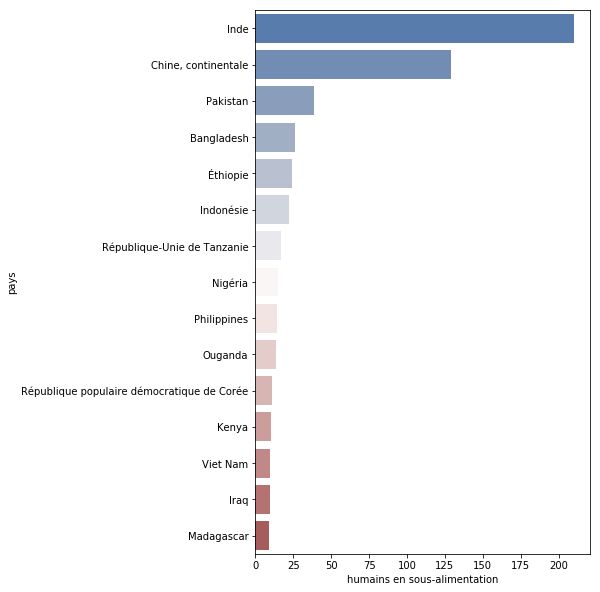

In [140]:
#graphique par habitant en sous-alimention en million
f, ax = plt.subplots(figsize=(6, 10))
ax = sns.barplot(x="humains en sous-alimentation", y="pays", data=Prop_sousAlim_Monde1, 
                 palette="vlag") #
plt.show()

#sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
#plt.tight_layout(h_pad=2)

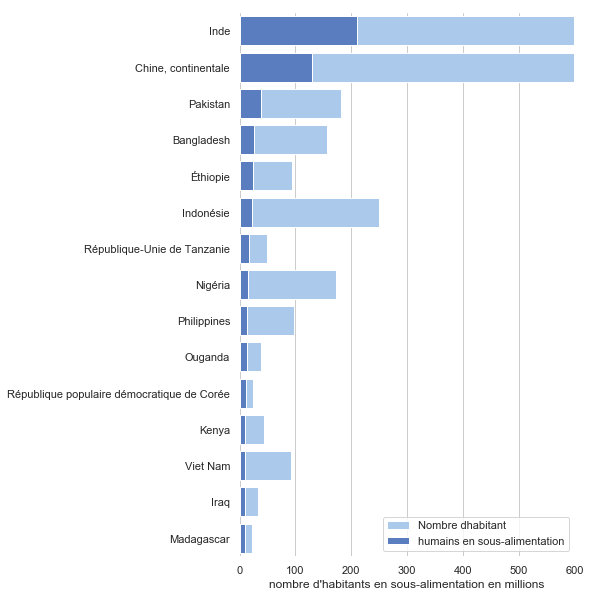

In [177]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 10))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Nombre dhabitant", y="pays", data=Prop_sousAlim_Monde1,
            label="Nombre dhabitant", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="humains en sous-alimentation", y="pays", data=Prop_sousAlim_Monde1,
            label="humains en sous-alimentation", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 600), ylabel="",
       xlabel="nombre d'habitants en sous-alimentation en millions")
sns.despine(left=True, bottom=True)

plt.show()

In [180]:
#classement des pays dont la part des habitants en malnutrition est la plus important
Prop_sousAlim_Monde2=Prop_sousAlim_MondeXX[['pays','Unité', 'humains en sous-alimentation','Nombre dhabitant', 
                      'part des habitants en sous-alimention']].round(2).sort_values('part des habitants en sous-alimention', 
                                                                                     ascending=False).round(2)[:18]

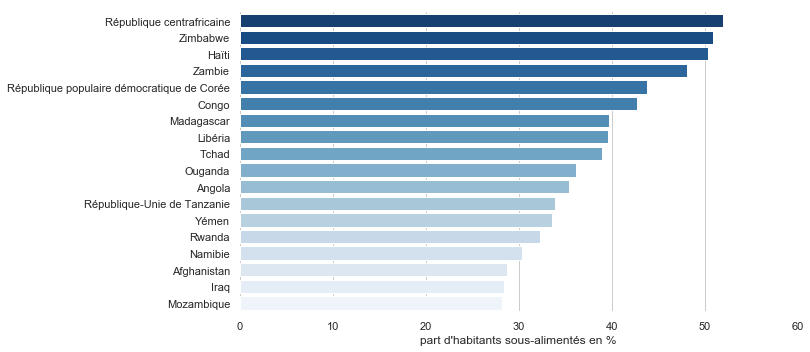

In [196]:
#graphique de la part des habitants en sous-alimention par ordre décroissant
f, ax = plt.subplots(figsize=(10,5.5 ))
ax = sns.barplot(x="part des habitants en sous-alimention", y="pays", data=Prop_sousAlim_Monde2,palette="Blues_r")
# Add a legend and informative axis label

ax.set(xlim=(0, 60), ylabel="",
       xlabel="part d'habitants sous-alimentés en %")
sns.despine(left=True, bottom=True)
plt.show()

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",
#       xlabel="part des habitants en sous-alimention")
#sns.despine(left=True, bottom=True)

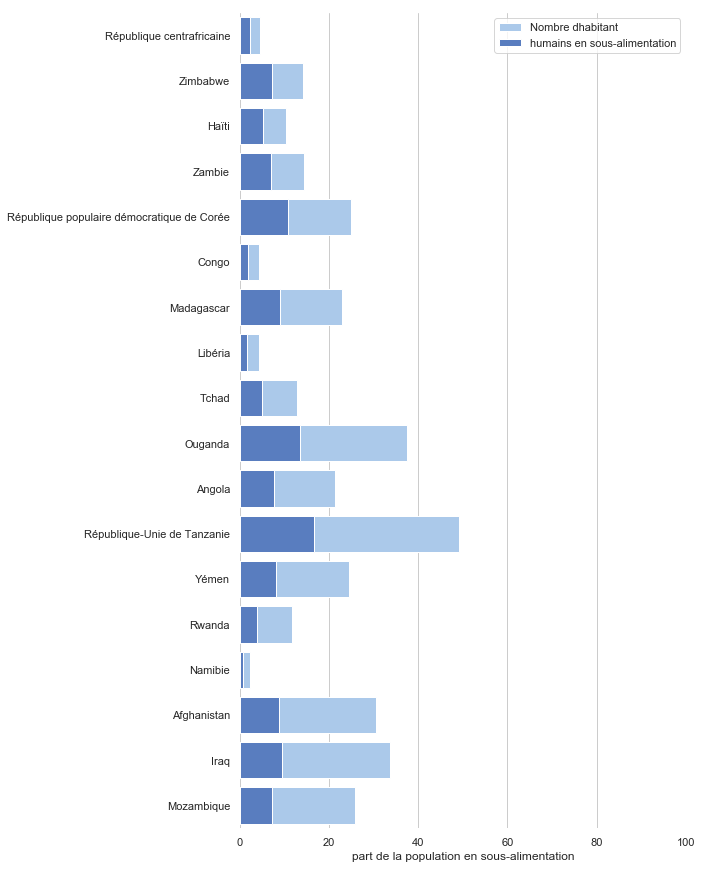

In [198]:
#graphique de la part des habitants en sous-alimention par ordre décroissant et nombre total d'habitant 
#en malnutrition
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Nombre dhabitant", y="pays", data=Prop_sousAlim_Monde2,
            label="Nombre dhabitant", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="humains en sous-alimentation", y="pays", data=Prop_sousAlim_Monde2,
            label="humains en sous-alimentation", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="part de la population en sous-alimentation")
sns.despine(left=True, bottom=True)

plt.show()

In [147]:
Prop_sousAlim_Monde.reset_index(inplace=True)
Prop_sousAlim_Monde.head()

,Zone,Code zone,Année,Unité,Nb_SousAlim,Nb_d_Hab_en_millions,Prop_Pop_sousAlim%
0,Afghanistan,2,2013,millions,8.8,30.552,28.803352
1,Afrique du Sud,202,2013,millions,2.8,52.776,5.305442
2,Albanie,3,2013,millions,0.2,3.173,6.303183
3,Algérie,4,2013,millions,1.6,39.208,4.080800
4,Angola,7,2013,millions,7.6,21.472,35.394933


In [148]:
#classement des pays africains par nombre d'habitant en sous-alimentation
#Pivot1.loc[Pivot1['Code zone'].isin(List_Afriq)]
SouSAlim_afrique=Prop_sousAlim_Monde[['Zone','Code zone', 'Unité','Nb_SousAlim','Nb_d_Hab_en_millions',
                                      'Prop_Pop_sousAlim%']].loc[Prop_sousAlim_Monde['Code zone'].isin(List_Afriq)]

In [202]:
SouSAlim_afrique1=SouSAlim_afrique.sort_values('Prop_Pop_sousAlim%', ascending=False)[:18]
SouSAlim_afrique1.head()

,Zone,Code zone,Unité,Nb_SousAlim,Nb_d_Hab_en_millions,Prop_Pop_sousAlim%
86,République centrafricaine,37,millions,2.4,4.616,51.993068
113,Zimbabwe,181,millions,7.2,14.150,50.883392
112,Zambie,251,millions,7.0,14.539,48.146365
26,Congo,46,millions,1.9,4.448,42.715827
58,Madagascar,129,millions,9.1,22.925,39.694656


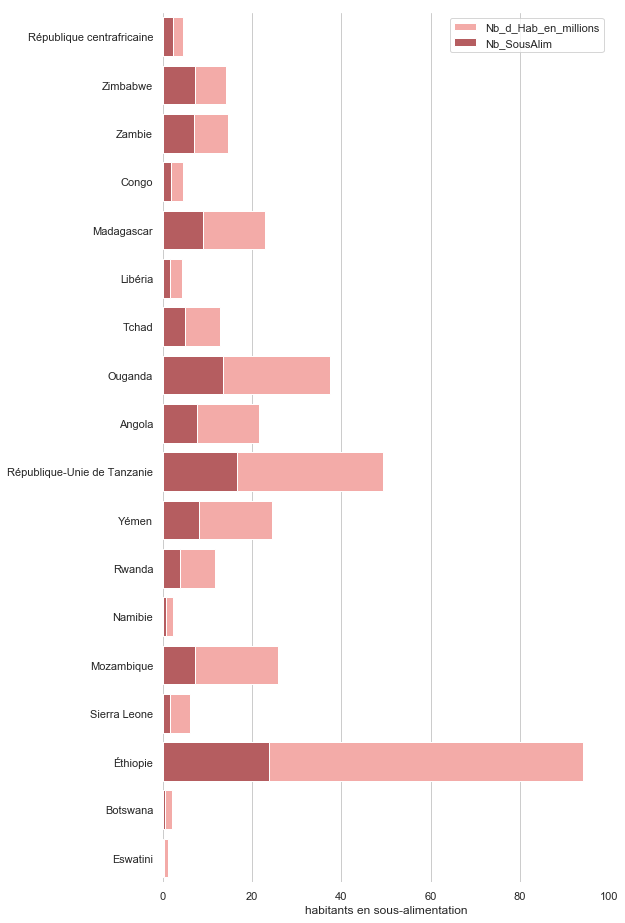

In [203]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 16))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Nb_d_Hab_en_millions", y="Zone", data=SouSAlim_afrique1,
            label="Nb_d_Hab_en_millions", color="r")

# Plot the crashes where alcohol was involved
sns.set_color_codes("deep")
sns.barplot(x="Nb_SousAlim", y="Zone", data=SouSAlim_afrique1,
            label="Nb_SousAlim", color="R")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="habitants en sous-alimentation")
sns.despine(left=True, bottom=True)

plt.show()

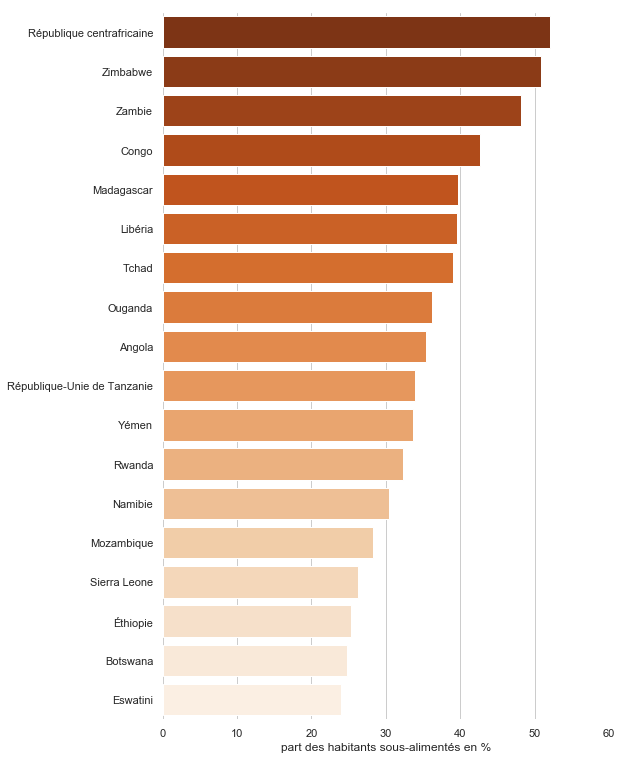

In [205]:
#graphique de la part des habitants en sous-alimention par ordre décroissant
f, ax = plt.subplots(figsize=(8, 13))
ax = sns.barplot(x="Prop_Pop_sousAlim%", y="Zone", data=SouSAlim_afrique1,palette="Oranges_r")
ax.set(xlim=(0, 60), ylabel="",
       xlabel="part des habitants sous-alimentés en %")
sns.despine(left=True, bottom=True)
plt.show()